<a href="https://colab.research.google.com/github/Vijaysiraw/ML_Classification_Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Vijay Singh
##### **Team Member 2 -** Harshit Bansal
##### **Team Member 3 -** Sushmitha Kadam



# **Project Summary -**

**Introduction :**




Cardiovascular diseases, also called CVDs, are the leading cause of death globally, causing an estimated 17.9 million deaths each year.

***CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions.*** More than four out of five CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.

Changes in lifestyle, lack of exercise, increased stress, and other factors have all contributed to an increase in the number of persons suffering from cardiovascular ailments in recent years.People are more sensitive to cardiac illnesses for a variety of reasons, and these conditions can cause sudden death without warning.We can reduce prospective heart problems and live a healthier life if we grasp the underlying causes of such heart diseases.


The most important behavioural risk factors of heart disease and stroke are **unhealthy diet, physical inactivity, tobacco use** and **harmful use of alcohol**.

The effects of behavioural risk factors may show up in individuals as raised blood pressure, raised blood glucose, raised blood lipids, and overweight and obesity.


The goal of this project is to use machine learning techniques to predict the 10-year risk of future coronary heart disease (CHD) in patients using data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. It includes over 3,390 records and 17 attributes, each representing a potential risk factor for CHD. These attributes included demographic, behavioral, and medical risk factors.


**Dataset :**

**data_cardiovascular_risk.csv :**
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. It includes over 3,390 records and 17 attributes. There are both demographic, behavioral, and medical risk factors.



**Conclusion:-**





# **GitHub Link -**

*   Vijay Singh :- https://github.com/Vijaysiraw/ML_Classification_Cardiovascular_Risk_Prediction

# **Problem Statement**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries



In [ ]:
# Import Libraries
#There are lots of libraries present in Python; we are importing some of them, which will be used further in this project.

# Import Libraries
import numpy as np
import pandas as pd

# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import warnings
import warnings
warnings.filterwarnings("ignore")

#Import other
from datetime import datetime
from importlib import reload

In [ ]:
# Import preporcessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN,SMOTETomek
from collections import Counter
# Importing various machine learning models.
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import make_scorer, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

#save and load model in joblib file
import requests
from joblib import load
from io import BytesIO

### Dataset Loading

In [ ]:
# Load Dataset from github repository
# Below is the link of the github repository where we have uploaded our dataset
cvrp_data_url = 'https://raw.githubusercontent.com/Vijaysiraw/ML_Classification_Cardiovascular_Risk_Prediction/main/data_cardiovascular_risk.csv'

In [ ]:
# Now we are going to read the dataset
cvrp_data = pd.read_csv(cvrp_data_url, encoding='unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
#Here we are going to take a look at the data that how its look like so we are using
#head() function which by default gives us the top 5 rows of the data
#and tail() function which gives us the bottom 5 rows of the data

In [ ]:
# View first 5 rows of the dataset
cvrp_data.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
# View last 5 rows of the dataset
cvrp_data.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
#Here we are using shape function which tells us about the numbers of rows and columns in the dataset
print(f"The shape of cardiovascular risk prediction dataset is {cvrp_data.shape}")
print(f"Number of Rows in cardiovascular risk prediction dataset is     -  {cvrp_data.shape[0]}")
print(f"Number of Columns in cardiovascular risk prediction dataset is  -  {cvrp_data.shape[1]}")

The shape of cardiovascular risk prediction dataset is (3390, 17)
Number of Rows in cardiovascular risk prediction dataset is     -  3390
Number of Columns in cardiovascular risk prediction dataset is  -  17


### Dataset Information

In [ ]:
# Dataset Info
cvrp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
cvrp_data.duplicated().value_counts()

False    3390
dtype: int64

Total Number of Duplicate values in Cardiovascular risk prediction dataset is 0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Checking missing values/null values count for each column
cvrp_data.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
na_data = cvrp_data.isnull().sum()
total_na_percentage = (na_data.sum()/cvrp_data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_na_percentage, 2)} %')

The total percentage of missing data is 15.04 %


<Axes: >

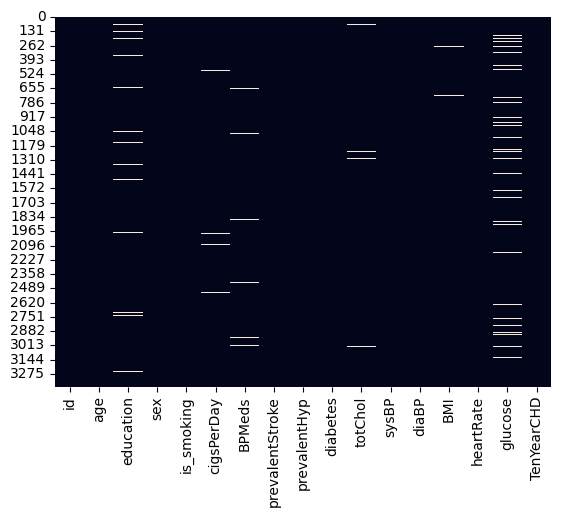

In [ ]:
# Visualizing the missing values
#To see the missing data we are going to use the heatmap method.
sns.heatmap(cvrp_data.isnull(), cbar=False)

### What did you know about your dataset?

#### **Dataset info :**

The dataset is from an ongoing cardiovascular study. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information.

It includes over 3,390 records and 17 attributes.

Cardiovascular risk prediction dataset has **17 variables** and **3390 observations**.and there are **510 (around 15.04%) observations are missing** and it contains **Zero duplicate rows**.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
cvrp_data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
#The described method will help to see how data has been spread for numerical values.
# We can clearly see the minimum value, mean values, different percentile values, and maximum values.
cvrp_data.describe(include='all')

id          age    education   sex is_smoking   cigsPerDay  \
count   3390.000000  3390.000000  3303.000000  3390       3390  3368.000000   
unique          NaN          NaN          NaN     2          2          NaN   
top             NaN          NaN          NaN     F         NO          NaN   
freq            NaN          NaN          NaN  1923       1703          NaN   
mean    1694.500000    49.542183     1.970936   NaN        NaN     9.069477   
std      978.753033     8.592878     1.019081   NaN        NaN    11.879078   
min        0.000000    32.000000     1.000000   NaN        NaN     0.000000   
25%      847.250000    42.000000     1.000000   NaN        NaN     0.000000   
50%     1694.500000    49.000000     2.000000   NaN        NaN     0.000000   
75%     2541.750000    56.000000     3.000000   NaN        NaN    20.000000   
max     3389.000000    70.000000     4.000000   NaN        NaN    70.000000   

             BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count   3346.000000      3390.000000   3390.000000  3390.000000  3352.000000   
unique          NaN              NaN           NaN          NaN          NaN   
top             NaN              NaN           NaN          NaN          NaN   
freq            NaN              NaN           NaN          NaN          NaN   
mean       0.029886         0.006490      0.315339     0.025664   237.074284   
std        0.170299         0.080309      0.464719     0.158153    45.247430   
min        0.000000         0.000000      0.000000     0.000000   107.000000   
25%        0.000000         0.000000      0.000000     0.000000   206.000000   
50%        0.000000         0.000000      0.000000     0.000000   234.000000   
75%        0.000000         0.000000      1.000000     0.000000   264.000000   
max        1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count   3390.00000  3390.000000  3376.000000  3389.000000  3086.000000   
unique         NaN          NaN          NaN          NaN          NaN   
top            NaN          NaN          NaN          NaN          NaN   
freq           NaN          NaN          NaN          NaN          NaN   
mean     132.60118    82.883038    25.794964    75.977279    82.086520   
std       22.29203    12.023581     4.115449    11.971868    24.244753   
min       83.50000    48.000000    15.960000    45.000000    40.000000   
25%      117.00000    74.500000    23.020000    68.000000    71.000000   
50%      128.50000    82.000000    25.380000    75.000000    78.000000   
75%      144.00000    90.000000    28.040000    83.000000    87.000000   
max      295.00000   142.500000    56.800000   143.000000   394.000000   

         TenYearCHD  
count   3390.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.150737  
std        0.357846  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

### Variables Description


 **The dataset contains patient's information. (Each attribute is a potential risk factor). There are both demographic, behavioral, and medical risk factors.**


**Attribute Information:**

**1).Demographic:**

* **Sex**: male or female("M" or "F")

* **Age**: Age of the patient; (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

* **Education**: No further information provided

**2).Behavioral:**

* **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")

* **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

**3).Medical( history):**

* **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)

* **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)

* **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)

* **Diabetes**: whether or not the patient had diabetes (Nominal)
Medical(current)

* **Tot Chol**: total cholesterol level (Continuous)

* **Sys BP**: systolic blood pressure (Continuous)

* **Dia BP**: diastolic blood pressure (Continuous)

* **BMI**: Body Mass Index (Continuous)

* **Heart Rate**: heart rate (Continuos)

* **Glucose**: glucose level (Continuous)

**Predict variable (desired target)**

* **TenYearCHD** :10-year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
cvrp_data.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Making a copy of dataset
#data wrangling is the process of gathering,collecting and tranforming raw data into another format for better
#understanding, decision-making, accessing and analysis in less time.
#Before doing any data wrangling we are creating copy of our original dataset so any changes don't affect our original dataset
cv=cvrp_data.copy()

In [ ]:
# defining continuous independent variables separately
continous_var = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [ ]:
# defining dependent variable
target_var= ['TenYearCHD']

In [ ]:
# defining categorical independent variables separately
categorical_var = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

#### What all manipulations have you done and insights you found?

Since the data we possess is already clean and well-structured, there is no requirement for us to make any alterations in this aspect

However, we have made modifications to the columns, including Changed the names of all the columns for ease of use.

We have also defined the continuous variables, dependent variable and categorical variables for ease of plotting graphs.


Finally, we have 3390 records rows and 17 columns of data that can be used to analyze and gain valuable insights into the business. With this data, we can make informed decisions and accurately predict future trends.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **`1). Correlation Heatmap`**

A correlation heatmap is a graphical tool that displays the correlation between multiple variables as a color-coded matrix. It’s like a color chart 🌈 that shows us how closely related different variables are.

In [ ]:
# Finding correlation between different columns
cv.corr()

id       age  education  cigsPerDay    BPMeds  \
id               1.000000  0.016759  -0.030573   -0.017249  0.007080   
age              0.016759  1.000000  -0.172559   -0.192335  0.124376   
education       -0.030573 -0.172559   1.000000    0.011126 -0.019920   
cigsPerDay      -0.017249 -0.192335   0.011126    1.000000 -0.037080   
BPMeds           0.007080  0.124376  -0.019920   -0.037080  1.000000   
prevalentStroke -0.038873  0.059038  -0.034194   -0.042057  0.119402   
prevalentHyp     0.013236  0.308826  -0.084817   -0.079312  0.259548   
diabetes         0.003690  0.107875  -0.052013   -0.049016  0.071316   
totChol         -0.019889  0.274028  -0.020781   -0.024703  0.083299   
sysBP            0.019676  0.404845  -0.137195   -0.100834  0.263729   
diaBP            0.000832  0.221896  -0.060801   -0.068785  0.201217   
BMI              0.039849  0.138176  -0.133313   -0.100996  0.087932   
heartRate        0.024684 -0.002596  -0.046980    0.066759  0.018107   
glucose          0.015517  0.116135  -0.038732   -0.068797  0.064490   
TenYearCHD       0.009866  0.224927  -0.052751    0.066778  0.088020   

                 prevalentStroke  prevalentHyp  diabetes   totChol     sysBP  \
id                     -0.038873      0.013236  0.003690 -0.019889  0.019676   
age                     0.059038      0.308826  0.107875  0.274028  0.404845   
education              -0.034194     -0.084817 -0.052013 -0.020781 -0.137195   
cigsPerDay             -0.042057     -0.079312 -0.049016 -0.024703 -0.100834   
BPMeds                  0.119402      0.259548  0.071316  0.083299  0.263729   
prevalentStroke         1.000000      0.071652  0.010115 -0.010832  0.057568   
prevalentHyp            0.071652      1.000000  0.082565  0.159680  0.699285   
diabetes                0.010115      0.082565  1.000000  0.059080  0.124011   
totChol                -0.010832      0.159680  0.059080  1.000000  0.199159   
sysBP                   0.057568      0.699285  0.124011  0.199159  1.000000   
diaBP                   0.047235      0.612897  0.061165  0.154974  0.781908   
BMI                     0.018602      0.300464  0.089112  0.114305  0.333864   
heartRate              -0.019184      0.150815  0.039742  0.087458  0.178262   
glucose                 0.023607      0.086658  0.620211  0.062723  0.143090   
TenYearCHD              0.068627      0.166544  0.103681  0.094306  0.212703   

                    diaBP       BMI  heartRate   glucose  TenYearCHD  
id               0.000832  0.039849   0.024684  0.015517    0.009866  
age              0.221896  0.138176  -0.002596  0.116135    0.224927  
education       -0.060801 -0.133313  -0.046980 -0.038732   -0.052751  
cigsPerDay      -0.068785 -0.100996   0.066759 -0.068797    0.066778  
BPMeds           0.201217  0.087932   0.018107  0.064490    0.088020  
prevalentStroke  0.047235  0.018602  -0.019184  0.023607    0.068627  
prevalentHyp     0.612897  0.300464   0.150815  0.086658    0.166544  
diabetes         0.061165  0.089112   0.039742  0.620211    0.103681  
totChol          0.154974  0.114305   0.087458  0.062723    0.094306  
sysBP            0.781908  0.333864   0.178262  0.143090    0.212703  
diaBP            1.000000  0.380498   0.174904  0.071499    0.135979  
BMI              0.380498  1.000000   0.069655  0.093454    0.066947  
heartRate        0.174904  0.069655   1.000000  0.088334    0.020241  
glucose          0.071499  0.093454   0.088334  1.000000    0.138200  
TenYearCHD       0.135979  0.066947   0.020241  0.138200    1.000000

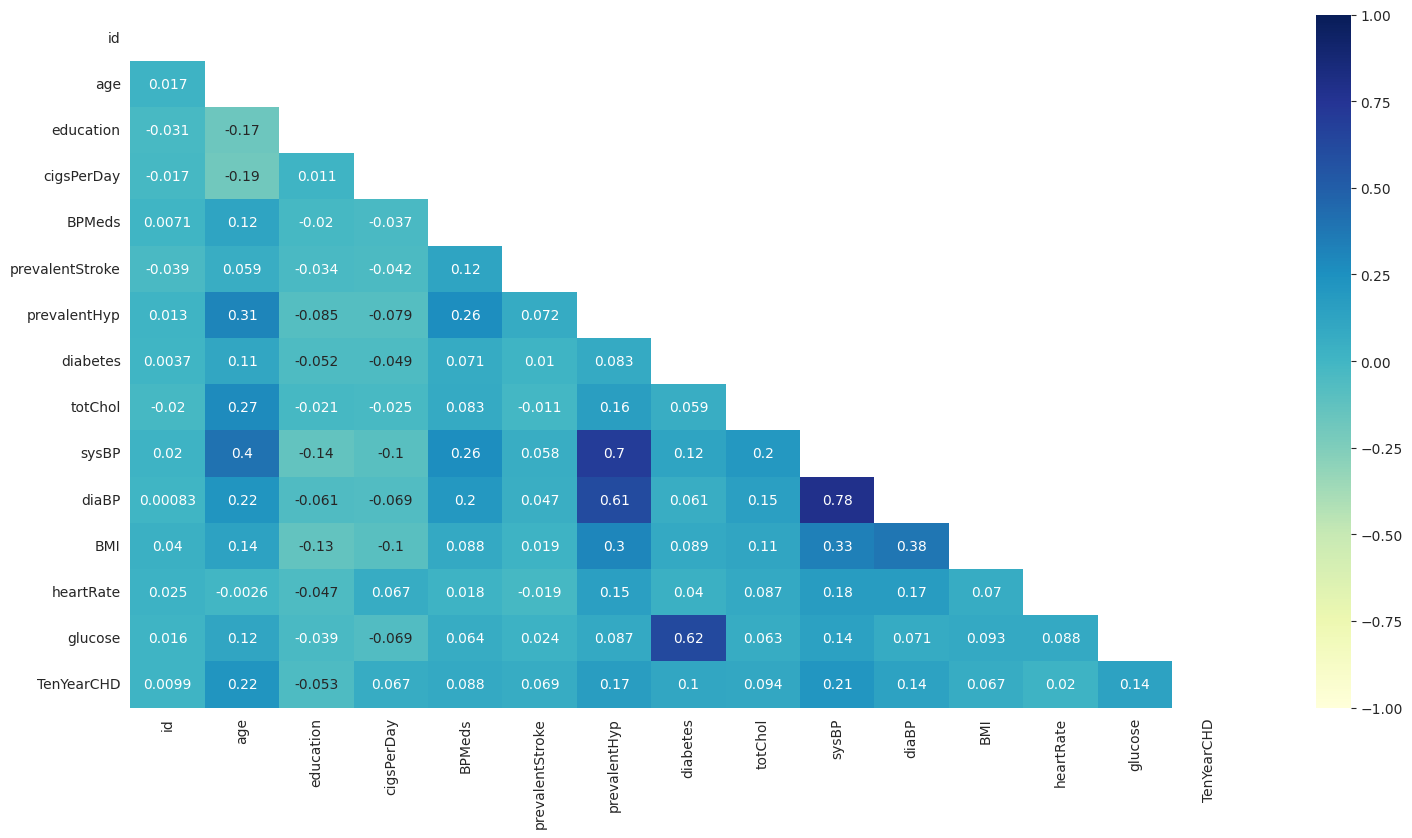

In [ ]:
# Heat map for Cardiovascular Risk Prediction
corr = cv.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Here we see that the systolic_bp and diastolic_bp are highly correlated, also diabetes and glucose have a correlation of 0.62.
Education is not importand as the CHD will not be acquired based on education level of a person so we can drop education column.

### **`2).Pie Charts of Each categorical independent variables `**

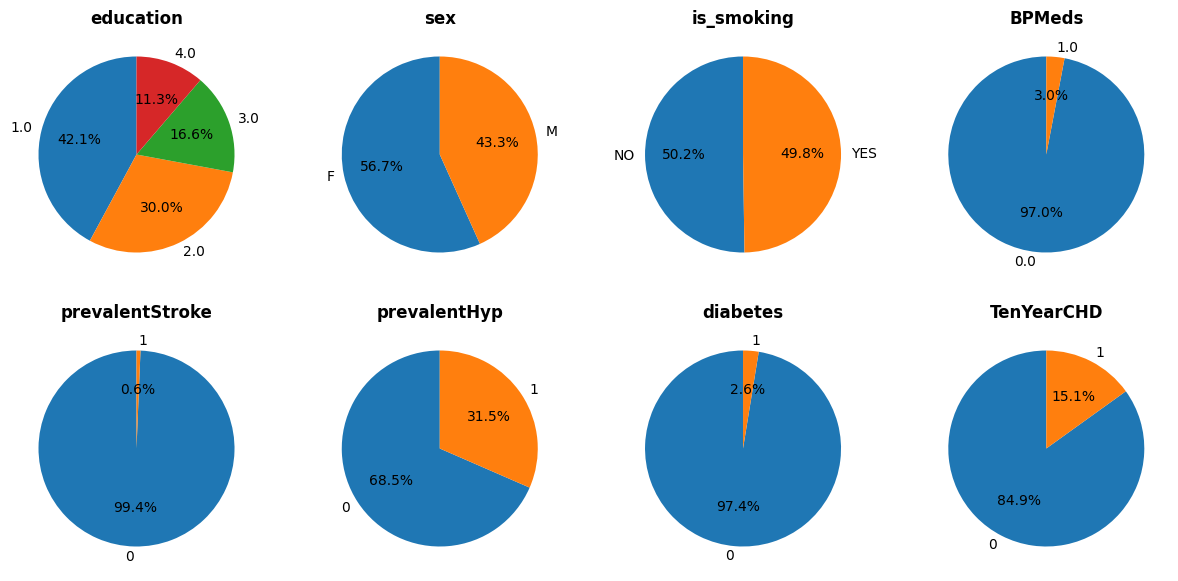

In [ ]:
#visualization code
list_of_variables=['education', 'sex', 'is_smoking', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']
plt.figure(figsize=(15,7))
# categorical data
for i,col in enumerate(list_of_variables):
  counts = cvrp_data[col].value_counts()
  plt.subplot(2,4,i+1)
  # Plot the donut chart
  plt.pie(counts, labels=counts.index, startangle=90, autopct='%1.1f%%')
  plt.title(f'{col}',weight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

The above charts have been used to find the proportions of each category present in each categorical column.

##### 2. What is/are the insight(s) found from the chart?

The following insights are gained from the above charts.
* 42.1% people have education level 1, 30.0% people have education level 2, only 16.6% and 11.3% people have education levels 3 and 4, resepectively.

* In our dataset, 56.7% are females and 43.3% are males.

* Approximately half of the people don't smoke.

* And 18% people smoke 20 cigarettes per day.
* 97% people don't take BP meds.
* Only 0.6% people had earlier stroke.
* 68.5% people have prevalent hypertension and 31.5% haven't.
* Only 2.6% people have diabetes
* In our data, approximately 85% people don't have CHD and 15% people have CHD.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insights suggest that the data is imbalanced.

### **`3).Plot for Each Continuous Variables (Univariate)`**


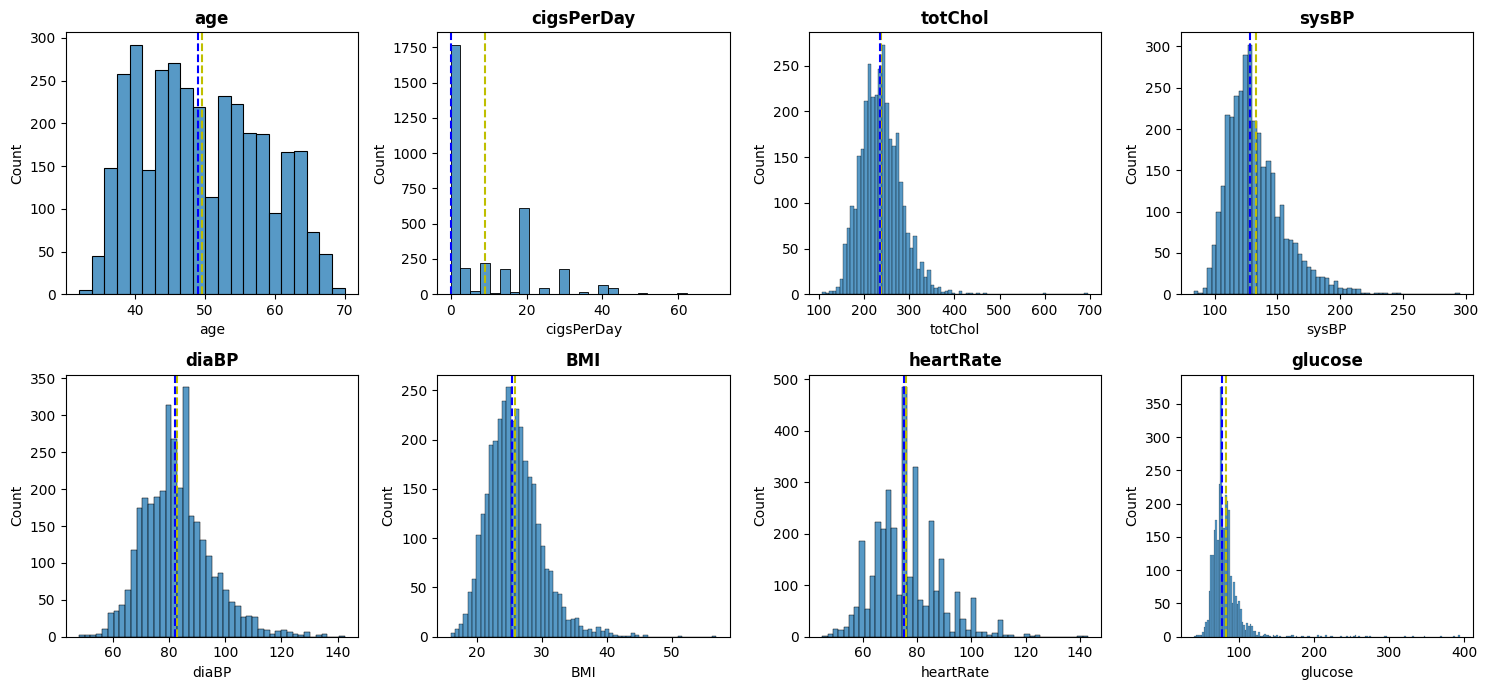

In [ ]:
#visualization code
#Check the distribution of each numerical columns using histogram
plt.figure(figsize=(15,7))
for i,col in enumerate(continous_var):
  ax=plt.subplot(2,4,i+1)
  sns.histplot(cvrp_data[col])
  ax.axvline(cvrp_data[col].mean(),color='y',linestyle='--')
  ax.axvline(cvrp_data[col].median(),color='b',linestyle='--')
  plt.title(f'{col}',weight='bold')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The histogram are used to find the outliers in the data, check the distribution, skewness, etc. of any continuous variable present in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The following insights we gained from the above plot.
* The maximum people lies between the age 37 and 55 years in the available dataset.
* Most people (approx 1750) don't smoke, and 20 cigs per day is consumed by approximately 625 people.
* Total cholestrol follows a normal distribution except there are some outliers in the data.
* Systolic BP follows an approximetly normal distribution. It has some outliers, and it shows a positive skewness (very little).
* The diastolic BP denotes a bell curve except when diaBP is around 80.
* BMI column shows a normal distribution but it has a few outliers.
* Most people's heart rate lies between 60 and 90.
* Glucose has lot of outliers in the right so, it is a positively skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insights helps in modeling. These insights will help us in data transformation, scaling the data, etc.
From this chart, we get a lot of insights about the numerical columns, and it will lead to a good business impact (to detect the CHD at earliest).

### **`4).Plot between each categorical variable and the target variable (Bivariate)`**

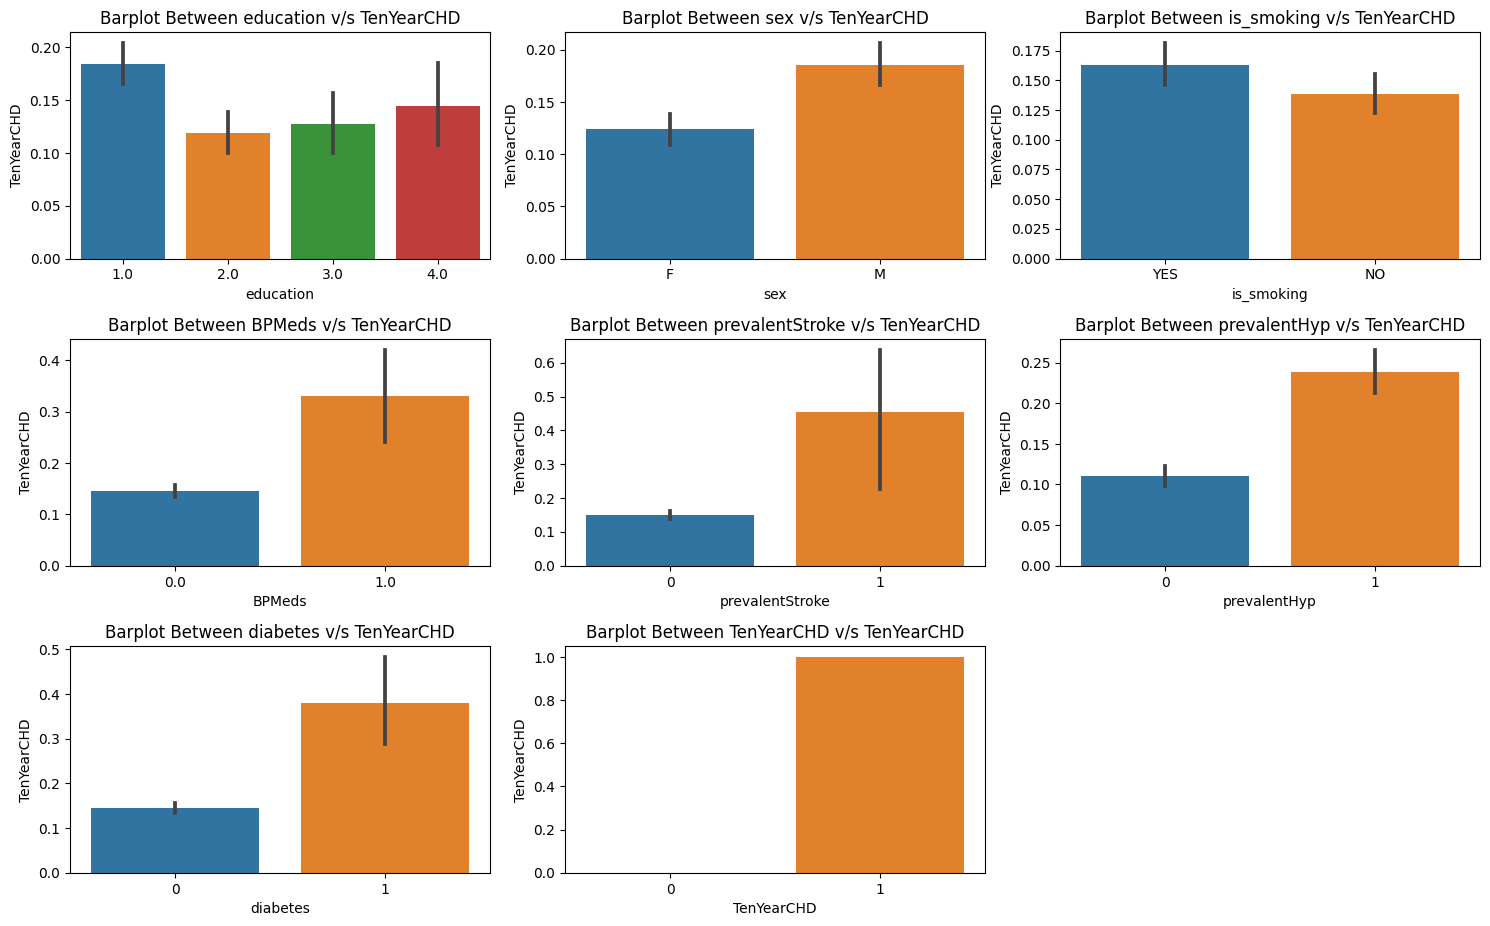

In [ ]:
#visualization code
# Bar plot between categorical column (containing two or four values) and the target variable
plt.figure(figsize=(15,12))
for i,col in enumerate(categorical_var):
    plt.subplot(4,3,i+1)
    sns.barplot(x=cvrp_data[col], y=cvrp_data['TenYearCHD'])
    plt.title(f'Barplot Between {col} v/s TenYearCHD')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is ideal for this use case because it clearly visualizes the frequency and sum of each category, making it easy to compare the number of bike rentals per month. It also allows you to quickly spot any trends in the data, such as an increase or decrease in bike rentals over time.

##### 2. What is/are the insight(s) found from the chart?

The following insights are gained using the above plots.
* Chances of getting CHD is more if they have diabetes.

* People having education level 1 are prone to getting CHD followed by level 4, and least of level 2.

* The probability of getting CHD is more in males.

* The people who are taking BP meds are at high risk of getting CHD.

* People have high probability of getting CHD who had earlier prevalent stroke.
* People have high probability of getting CHD who had earlier prevalent hypertension.

* The probability of getting CHD is more in people who smoke compared to the people who don't.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above chart reflects lot of insights, and it can be used for feature engineering. And this will lead to positive business impact.

### **`5).Education level vs no of patients(bi-variate)`**

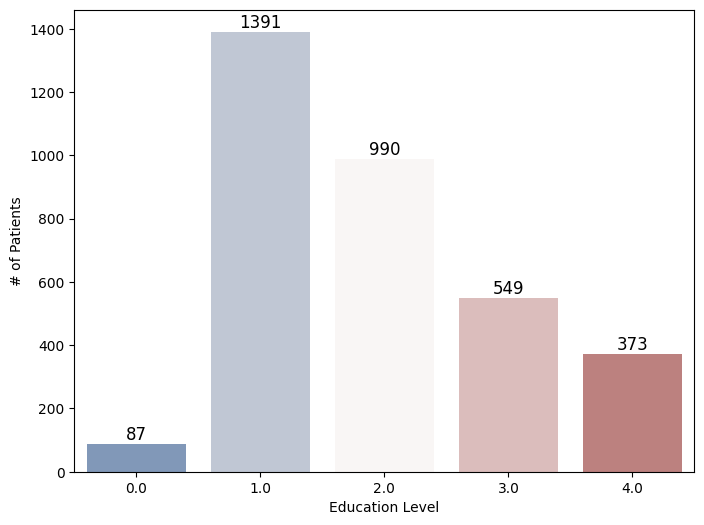

In [ ]:
#visualization code
#copy data for grouping data with respect of CVD
edu = cvrp_data.copy()
#education null value define as 0
edu.education = edu.education.fillna(value=0)
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.countplot (x='education', data = edu, palette= 'vlag')
ax.set(xlabel='Education Level', ylabel='# of Patients')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, ha='center', va='bottom')

##### 1. Why did you pick the specific chart?

Bar plots are a commonly used visualization tool in data analysis and data science, and they are a key component of the matplotlib library in Python. Bar plots are important because they allow you to quickly and easily visualize and compare the values of categorical data. They are especially useful when you want to compare the frequency or distribution of different categories of data.

##### 2. What is/are the insight(s) found from the chart?

The following insights are extracted from the above bar plot chart.
* 87 people have education level 0 which means unknown education status.
* 1391 people have education level 1.
* 990 people have education level 2.
* 550 people have education level 3.
* 373 people have education level 4


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information only tells us about the number of patient present in our dataset and their education level. This varaible is generaly doesn't causes much effect on our target variable (TenYearCHD).

### **`6).Plot between age and TenYearCHD (Bivariate)`**

Text(0.5, 1.0, 'CVD with respect of Age')

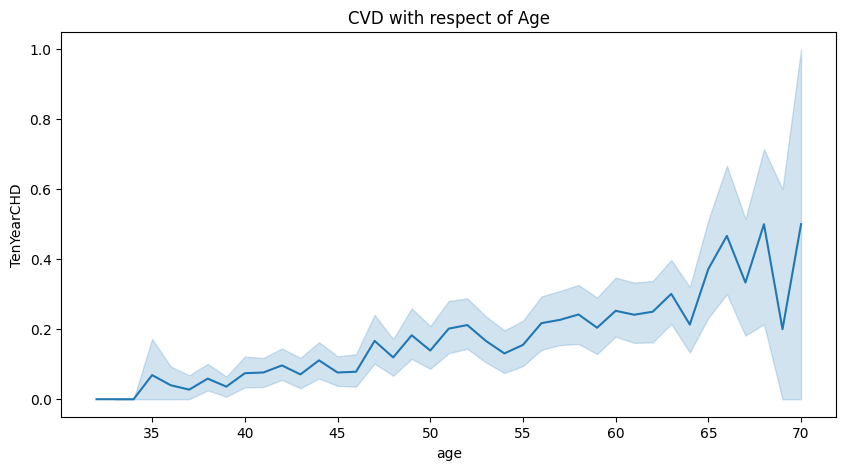

In [ ]:
#visualization code
plt.figure(figsize=(10,5))
sns.lineplot(x='age', y="TenYearCHD", data=cvrp_data)
plt.title("CVD with respect of Age")

##### 1. Why did you pick the specific chart?

To check the linear relationship between age and target variable (TenYearCHD).

##### 2. What is/are the insight(s) found from the chart?

From the above chart, it is clearly visible that the chances of getting CHD is proportional to the age. So, if a person is aged he has high risk of getting CHD and vice-versa.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will definitely help in predicting CHD because the target variable and age are possitively correlated.

### **`7).Plot between BMI and TenYearCHD (Bivariate)`**

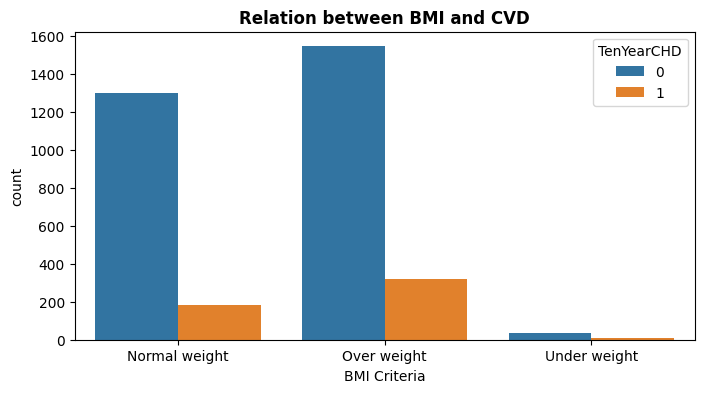

In [ ]:
#visualization code
#copy data
df_vis=cvrp_data.copy()
#lets convert data in categorical form
#Under weight <=18.5, Normal weight = 18.5 to 24.9 ,Over weight=above 25 bmi
df_vis['BMI Criteria'] = cvrp_data['BMI'].apply(lambda x: 'Under weight' if x <=18.5 else ('Normal weight' if 18.5 < x <=24.9 else 'Over weight' ))
dfplot_count=df_vis.groupby(['BMI Criteria'])['TenYearCHD'].value_counts()
dfplot_per=df_vis.groupby(['BMI Criteria'])['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
ma_con=pd.concat([dfplot_count,dfplot_per], axis=1, keys=['count','Risk of THD']).reset_index()
plt.figure(figsize=(8,4))
ax=sns.barplot(x=ma_con['BMI Criteria'], y=ma_con['count'],hue=ma_con['TenYearCHD'])
plt.title("Relation between BMI and CVD",weight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Catplot is used to create a categorical plot. Categorical plots are plots that are used to visualize the distribution of a categorical variable. They can be used to show how a variable is related to a categorical variable and can also be used to compare the distribution of multiple categorical variables.

To see the distribution of the rented bike on basis of season column we used catplot.

##### 2. What is/are the insight(s) found from the chart?

From above catplot we got know that:

1. There is low demand in winter
2. Also in all seasons upto the 2500 bike counts distribution is seen dense.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this catplot we know that there is high bike count upto the 2500 so, above that there maybe outliers present. business needs to evaluate that.

### **`8).Plot between Heart Rate and TenYearCHD`**

Text(0.5, 1.0, 'Distributions of Gender Vs heart_rate with Target class')

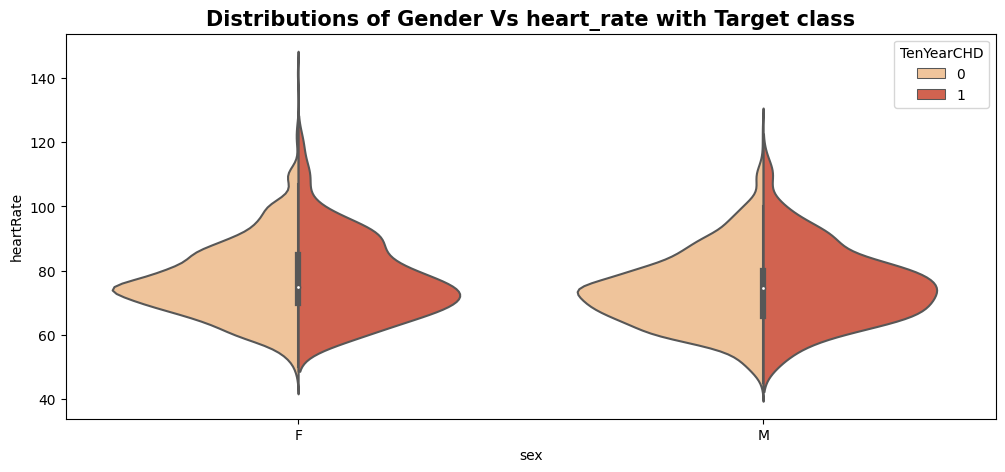

In [ ]:
#visualization code
plt.figure(figsize=(12,5))
sns.violinplot(data=cvrp_data,x="sex", y='heartRate',hue="TenYearCHD",palette = 'OrRd', split=True,ax=None)
plt.title("Distributions of Gender Vs heart_rate with Target class",fontsize=15,weight='bold')

##### 1. Why did you pick the specific chart?

A violin plot is a data visualization technique used in data science to display the distribution and density of a continuous variable or numerical data. It is similar to a box plot but provides more information about the distribution of the data by showing the shape of the distribution.

##### 2. What is/are the insight(s) found from the chart?

 As we can see from the violin plot, females have higher heart rates than males to devolop CHD.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This plot helps us to conclude a relationship between the TenYearCHD and heart rate and sex. And it helps the healthcare industries while predicting whether a person will get a CHD or not.

### **`9).Plot between age and Cigarette per day (Bivariate)`**

Text(0.5, 1.0, 'Cigarette consumption with respect of Age')

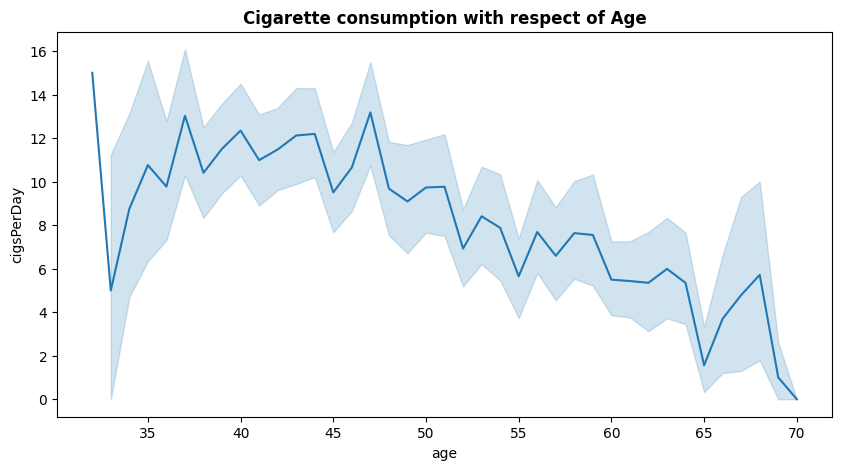

In [ ]:
#visualization code
plt.figure(figsize=(10, 5))
sns.lineplot(x='age', y="cigsPerDay", data=cvrp_data)
plt.title("Cigarette consumption with respect of Age",weight='bold')

##### 1. Why did you pick the specific chart?


To check the patterns between independent variable age with our dependent variable Cigarette per day  we used this lineplot.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, it is clearly visible that as the age of people increases the cigarette per day consume by people decreases.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will definitely help in predicting which age group people are consuming more cigarette per day.

### **`10). Plot between the Cigarates per day and TenYearCHD considering Sex (Multivariate)`**

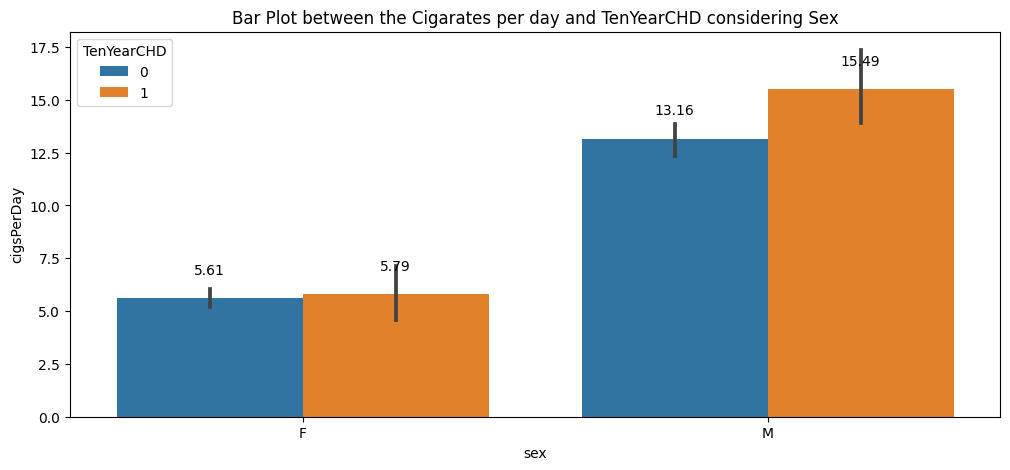

In [ ]:
#visualization code
plt.figure(figsize=(12,5))
cig=sns.barplot(x=cvrp_data['sex'],y=cvrp_data['cigsPerDay'],hue=cvrp_data['TenYearCHD'])
plt.title('Bar Plot between the Cigarates per day and TenYearCHD considering Sex')
for p in cig.patches:
    cig.annotate(round(p.get_height(),2),(p.get_x() + p.get_width()/2., p.get_height()+1), ha='center', va='bottom')

##### 1. Why did you pick the specific chart?

To know about the probability of getting CHD corressponding to the number of cigarates consumed per day (on the basis of sex).

##### 2. What is/are the insight(s) found from the chart?

As we see from the plot, the probability of getting CHD is high if cigsPerDay is 11 or 12. And it is less probable if cigsPerDay is 60 or 70. So, it does not gives the clear relationship between the cigsPerDay and getting CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights is not so useful to predict CHD on the basis of cigsPerDay (Cigarettes per day).

### **`11).Plot between the diabetes and Ten year CHD considering  column is_smoking (Multivariate)`**

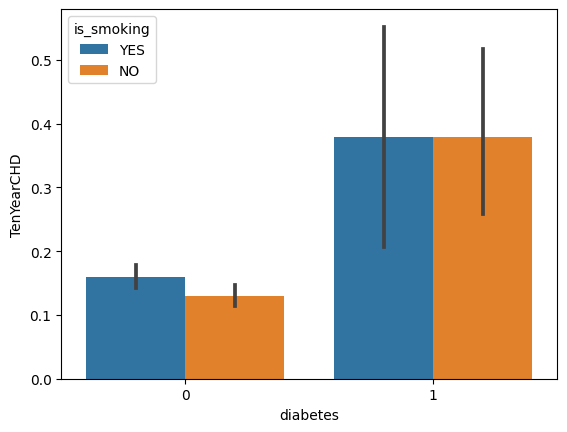

In [ ]:
#visualization code
sns.barplot(x=cvrp_data['diabetes'], y=cvrp_data['TenYearCHD'], hue=cvrp_data['is_smoking'])
plt.show()

##### 1. Why did you pick the specific chart?

We use the chart to find the relationship among the diabetes,is smoking and TenYearChd

##### 2. What is/are the insight(s) found from the chart?

Here, we can see that the people who are diabetic and do smoking are at high risk to heart disease and people who are only diabetic are also at high risk to heart disease.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight will definitely make a psoitive impact on predicting CHD because 'is_smoking' and 'diabetes' features may cause CHD.

### **`12).Plot between cholestrol and Ten Year CHD.`**

In [ ]:
# Chart - 10 visualization code
df_vis=cvrp_data.copy()
df_vis['Chol Criteria'] = cvrp_data['totChol'].apply(lambda x: 'Normal Cholestrol' if x <=240 else 'high cholestrol' )
dfplot_count=df_vis.groupby(['Chol Criteria'])['TenYearCHD'].value_counts()
dfplot_per=df_vis.groupby(['Chol Criteria'])['TenYearCHD'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
ma_con=pd.concat([dfplot_count,dfplot_per], axis=1, keys=['count','Risk of THD']).reset_index()
plt.figure(figsize=(8,4))
ax=sns.barplot(x=ma_con['TenYearCHD'], y=ma_con['count'],hue=ma_con['Chol Criteria'])

plt.show()

##### 1. Why did you pick the specific chart?

Here, we have used bar plot which helps to compare between different variable.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we can see that the persons having high cholestrol are more prone to heart disease.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight will help us to predict CHD.

### **`13).Pair Plot`**

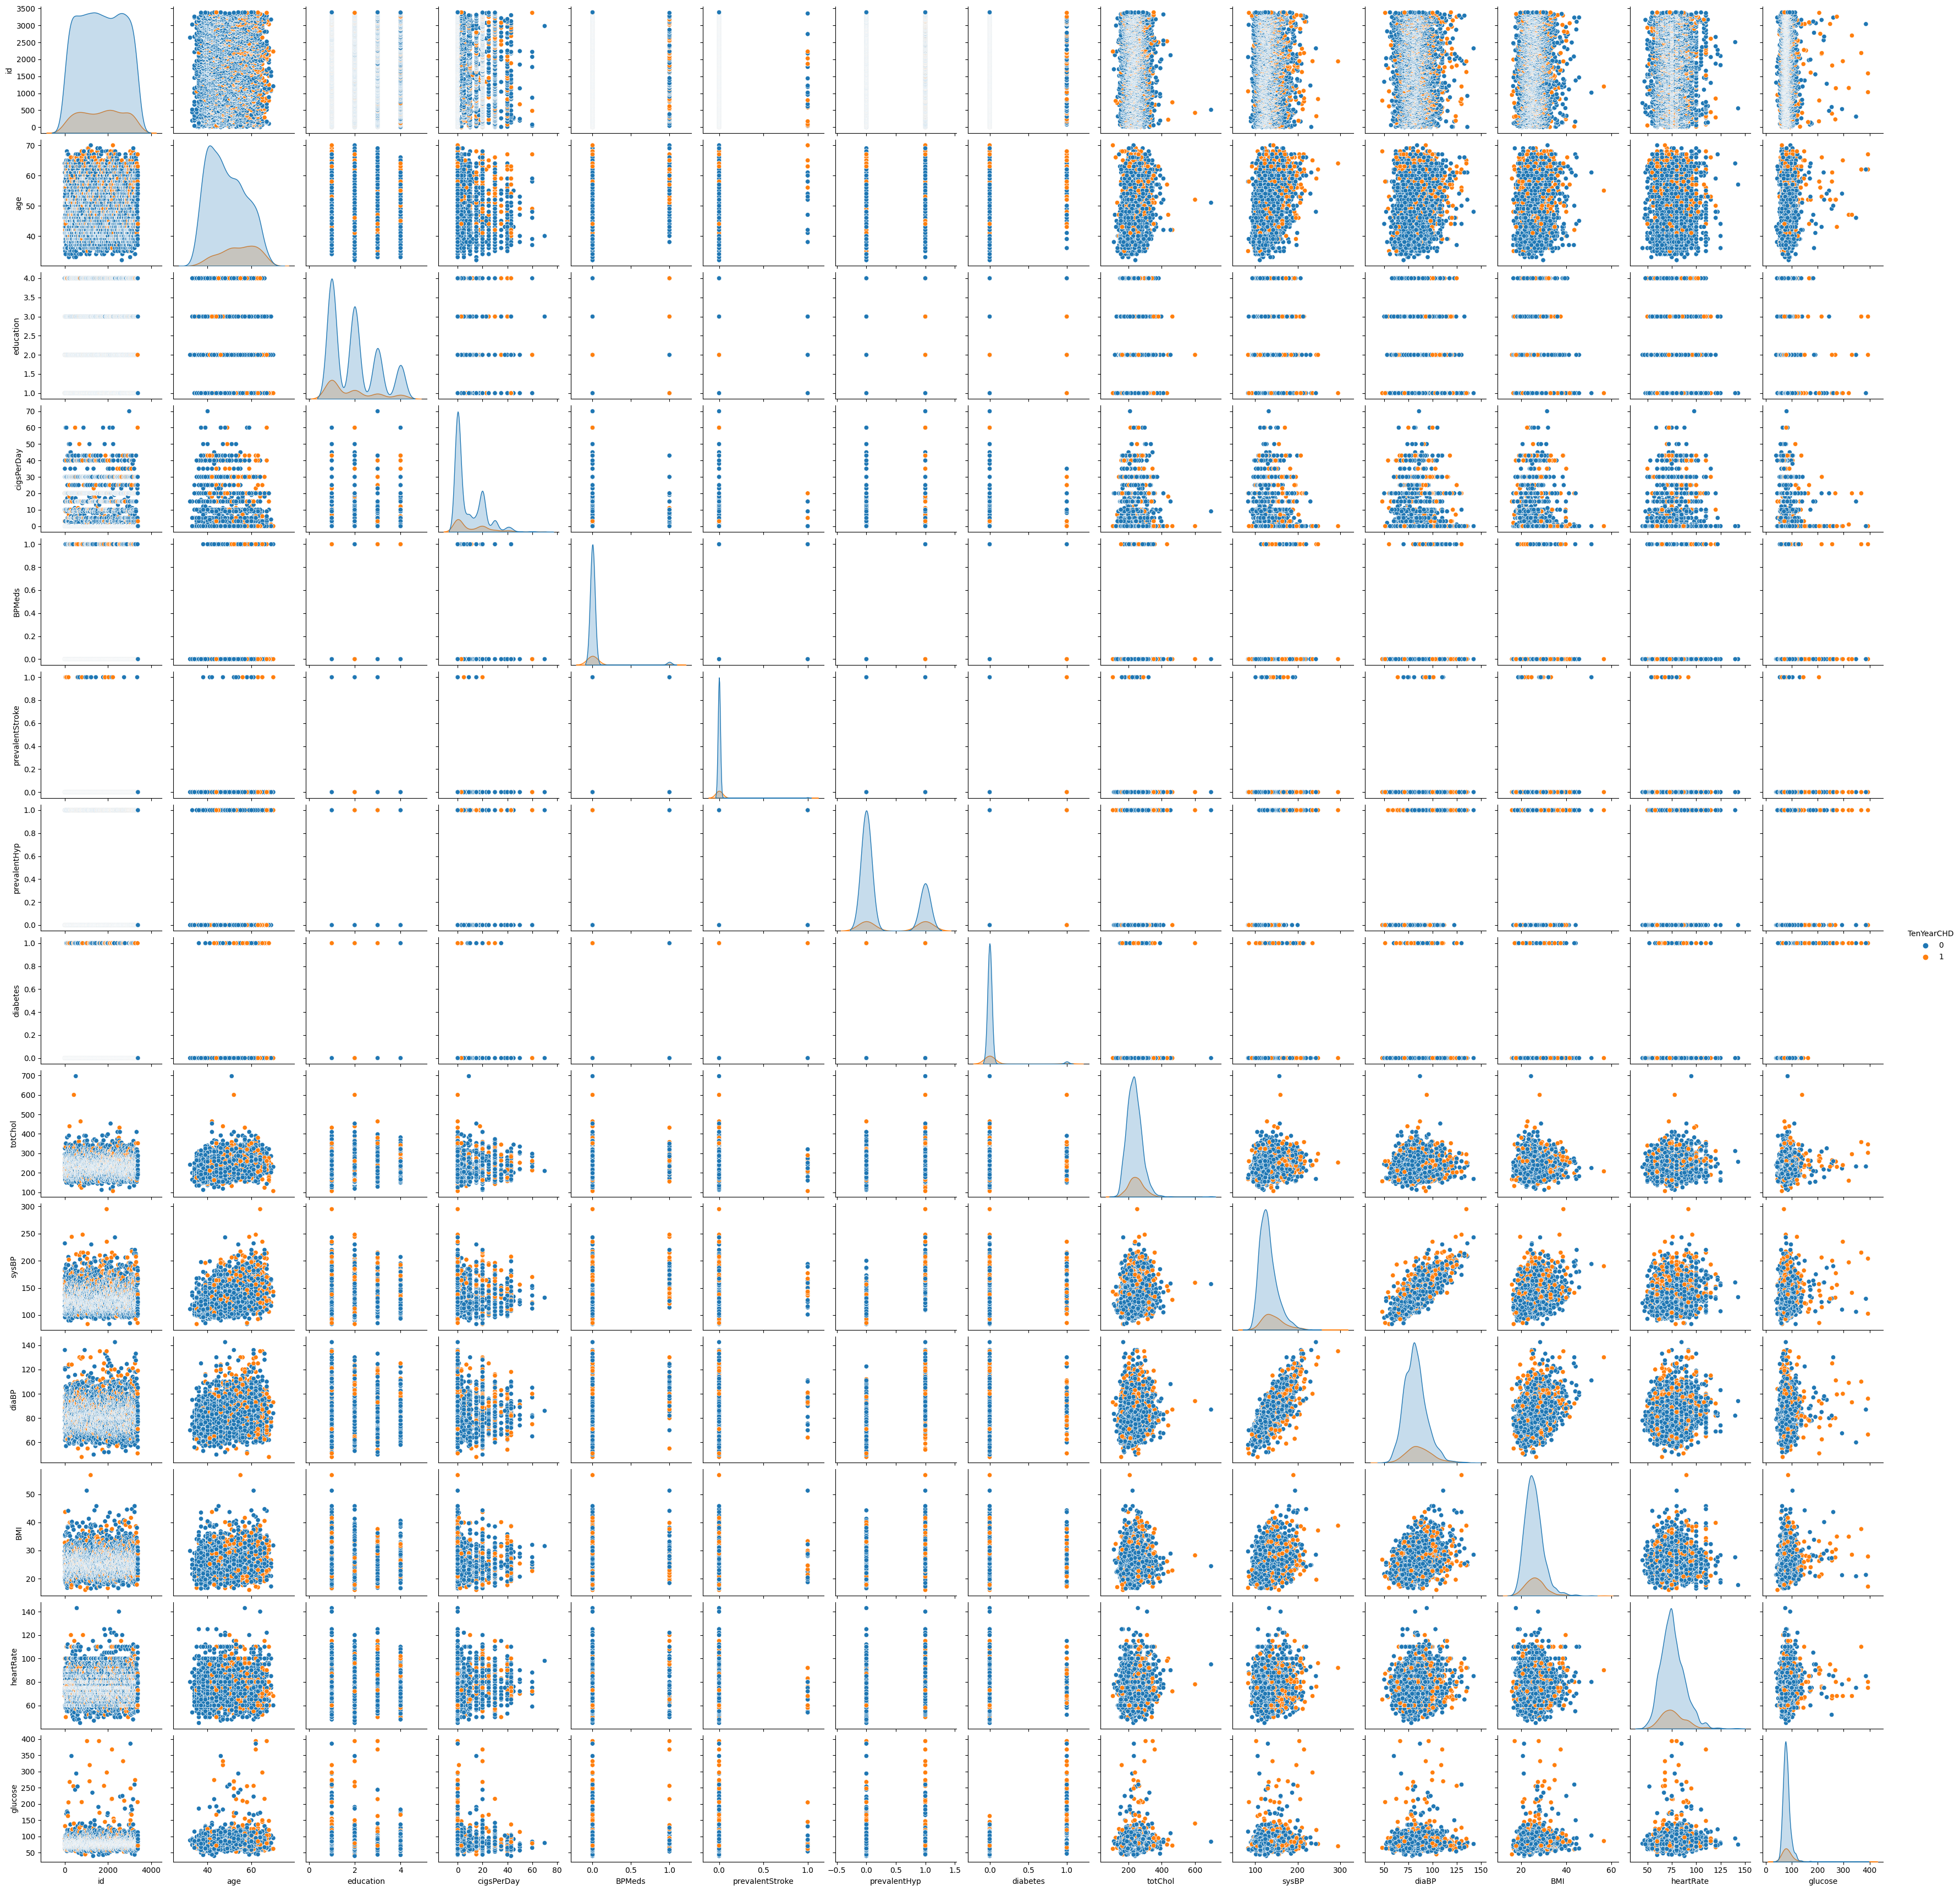

In [ ]:
# Pair Plot visualization code
# Create the pairplot using Seaborn
from seaborn.axisgrid import pairplot
sns.pairplot(cvrp_data, hue="TenYearCHD")

##### 1. Why did you pick the specific chart?

* By using pairplot we can visualize the pairwise relationships between the variables in the dataset, while also seeing how these relationships differ across different hours of the day.

* This can help us identify any patterns or trends that may exist between the variables, and how they may be affected by the time of day.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.



1.   Glucose data normally disribution or not
2.   correlation between sysBP and diaBP
3.   totChol data normally distribution and with same variance



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Glucose data normally disribution or not
*   Null hypothesis H0:-Data normally distribution
*   Alternate hypothesis Ha:-Data is not normally disribution



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
sample_glucose = cv['glucose'].sample(50,random_state=1)
stat, p_value=stats.shapiro(sample_glucose)
print("p value:%.4f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis >> The data is not normally distributed")
else:
    print("Fail to reject null hypothesis >> The data is normally distributed")

p value:1.0000
Fail to reject null hypothesis >> The data is normally distributed


##### Which statistical test have you done to obtain P-Value?

Hypothesis testing is performed using Shapiro, which checks if data is normally distributed or not as a result of hypothesis testing. This test results in a very high p-value, which indicates that the data is distributed normally

##### Why did you choose the specific statistical test?

Statistical tests such as the Shapiro-Wilk test are commonly used to assess the normality of data samples. The Shapiro-Wilk test is a widely used test because it is more powerful than other tests in detecting deviations from normality. It is also relatively easy to calculate and interpret.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

correlation between sysBP and diaBP
*   Null hypothesis H0:-there is no correlation between the two columns
*   Alternate hypothesis Ha:-there is a non-zero correlation between the two columns.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Select a random sample of the data
sample = cv.sample(n=50, random_state=1)

# Select the two columns
col1 = sample['sysBP']
col2 = sample['diaBP']

# Perform the Pearson correlation test
corr, p_value = stats.pearsonr(col1, col2)

# Print the results
print(f'Correlation: {corr:.4f}')
print(f'p-value: {p_value:.4f}')

if p_value < 0.05:
    print('There is a statistically significant correlation between the two columns.')
else:
    print('There is no statistically significant correlation between the two columns.')

Correlation: 0.7349
p-value: 0.0000
There is a statistically significant correlation between the two columns.


##### Which statistical test have you done to obtain P-Value?

we performed a Pearson correlation test to determine if there is a statistically significant correlation between the two columns of the sample data. in this test we find that correation between them is 0.7349 and p_value is very low so we can that there is significant correlation between them

##### Why did you choose the specific statistical test?

The Pearson correlation test was chosen because it is a common statistical test used to measure the strength and direction of the linear relationship between two continuous variables. It is a parametric test that assumes that the data is normally distributed and that the relationship between the two variables is linear. If these assumptions are met, the Pearson correlation test can provide a reliable measure of the correlation between the two columns.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

totChol data normally distribution and with same variance

*   Null hypothesis H0:-the mean of the sample is equal
*   Alternate hypothesis Ha:-the mean of the sample is not equal


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
groupA=cv['totChol'].sample(50,random_state=6)
groupB=cv['totChol'].sample(50,random_state=10)
# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(groupA, groupB)

# Print results
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")
# Interpret the results
if p_value < 0.05:
    print("Reject null hypothesis: significant difference between means.")
else:
    print("Fail to reject null hypothesis: no significant difference between means.")

t-statistic: -1.6819
p-value: 0.0958
Fail to reject null hypothesis: no significant difference between means.


##### Which statistical test have you done to obtain P-Value?

In this hypothesis we use student's t-test
*   t-statistic value is -1.6819
*   p_value is 0.0958



##### Why did you choose the specific statistical test?

In this hypothesis testing we use student's t-test. this test observations in each sample are normally distributed and each sample have the same variance.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Categorical Encoding

In [ ]:
# copy dataset for feature engineering
df=cv.copy()

In [ ]:
#drop unnecessary columns in data set
df.drop('id',axis=1,inplace=True)

In [ ]:
#In this data set, we have two columns that have a string data type.
#we using mapping technique to handle this problem
df['sex']=df['sex'].map({'F':0,'M':1})
df['is_smoking']=df['is_smoking'].map({'NO':0,'YES':1})

We want to convert 'glucose' data into sugar levels for easy understanding. but there are some missing values in these columns. So we will change the datatype and encoding after handling missing or null values.

### 2. Handling Missing Values

In [ ]:
#null values in every columns
null_data=df.isna().sum().sort_values(ascending = False)
percent_data=(df.isna().sum()/len(cv)).sort_values(ascending=False)*100
missing_data=pd.concat([null_data,percent_data],axis=1,keys=["Total", "Percentage"])

In [ ]:
#missing values
missing_data.head(7)

Total  Percentage
glucose       304    8.967552
education      87    2.566372
BPMeds         44    1.297935
totChol        38    1.120944
cigsPerDay     22    0.648968
BMI            14    0.412979
heartRate       1    0.029499

In [ ]:
#check data
print(df['BPMeds'].value_counts())
print(df['education'].value_counts())

0.0    3246
1.0     100
Name: BPMeds, dtype: int64
1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64


In [ ]:
#1.BPMeds
# Replacing the missing values in the categorical columns with its mode
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [ ]:
#2.eduaction
# replacing the missing value in the categorical columns with its mode
df['education']=df['education'].fillna(df['education'].mode()[0])

In this dataset, several variables are considered to be continuous data. These variables include glucose, BPMeds, totchol, cigarettes per day, BMI, and heart rate. and we can fill in these values by mean, median, and other methods. but in this data set, we try the KNNImputer method to fill in the null or missing values. The KNNImputer method is a supervised machine learning algorithm that uses the nearest neighbour of a given data point to fill in the missing values. It is a fast and efficient method for imputing missing values and can provide more accurate results than other methods.

In [ ]:
# Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

In [ ]:
#check null values in dataset
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
#change data type
df=df.astype({'age':int,'education':int,'sex':int,'is_smoking':int,'cigsPerDay':float,'BPMeds':int,'prevalentStroke':int,
            'prevalentHyp':int,'diabetes':int,'totChol':float,'sysBP':float,'diaBP':float,
            'BMI':float,'heartRate':float,'TenYearCHD':int,'glucose':float})

In [ ]:
#continous variables
con=['BMI', 'heartRate','age','cigsPerDay','sysBP','diaBP','totChol','glucose']

The data set was carefully checked for any missing values, and none were found. Therefore, the data set is complete and ready for analysis.

### 3. Handling Outliers

In [ ]:
#check outliers
def check_outier(f,x):
  plt.figure(figsize=(15,5))
  for i,col in enumerate(x):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=f[col])
    plt.xlabel(col)
    plt.tight_layout()

In [ ]:
#distribution check
def dist_check(f,x):
  plt.figure(figsize=(15,5))
  for i,col in enumerate(x):
    plt.subplot(3,3,i+1)
    sns.distplot(f[col])
    plt.axvline(f[col].mean(),color='r',linestyle='--')
    plt.axvline(f[col].median(),color='b',linestyle='--')
    plt.legend({'Mean': f[col].mean(), 'Median': f[col].median()})
    plt.xlabel(col)
    plt.tight_layout()

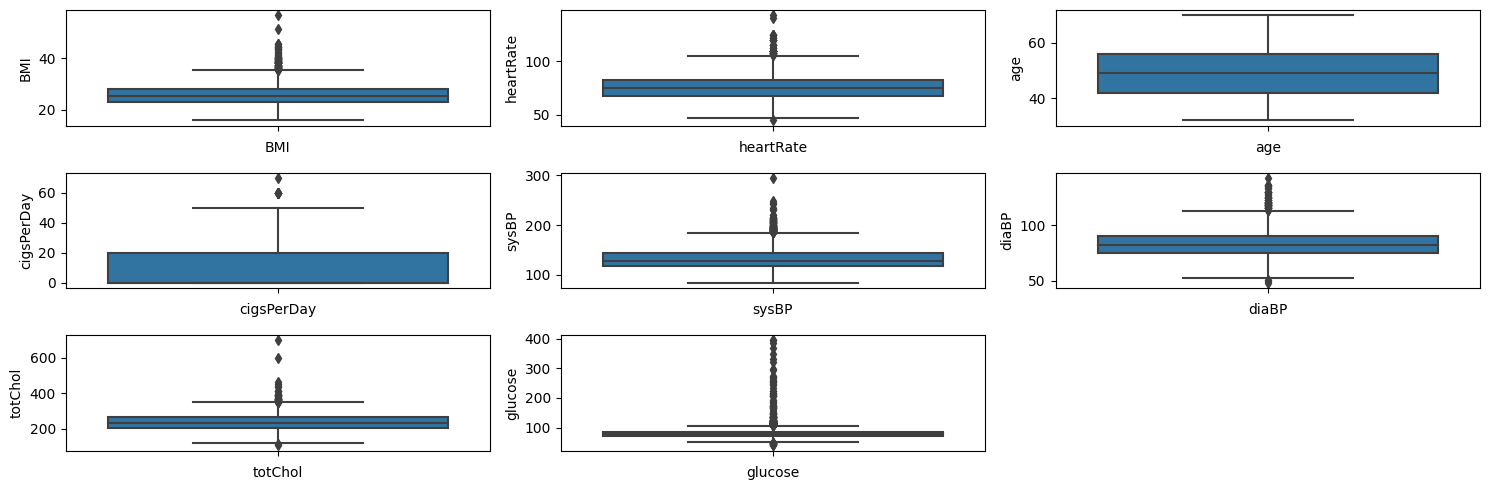

In [ ]:
#check outliers
check_outier(df,con)

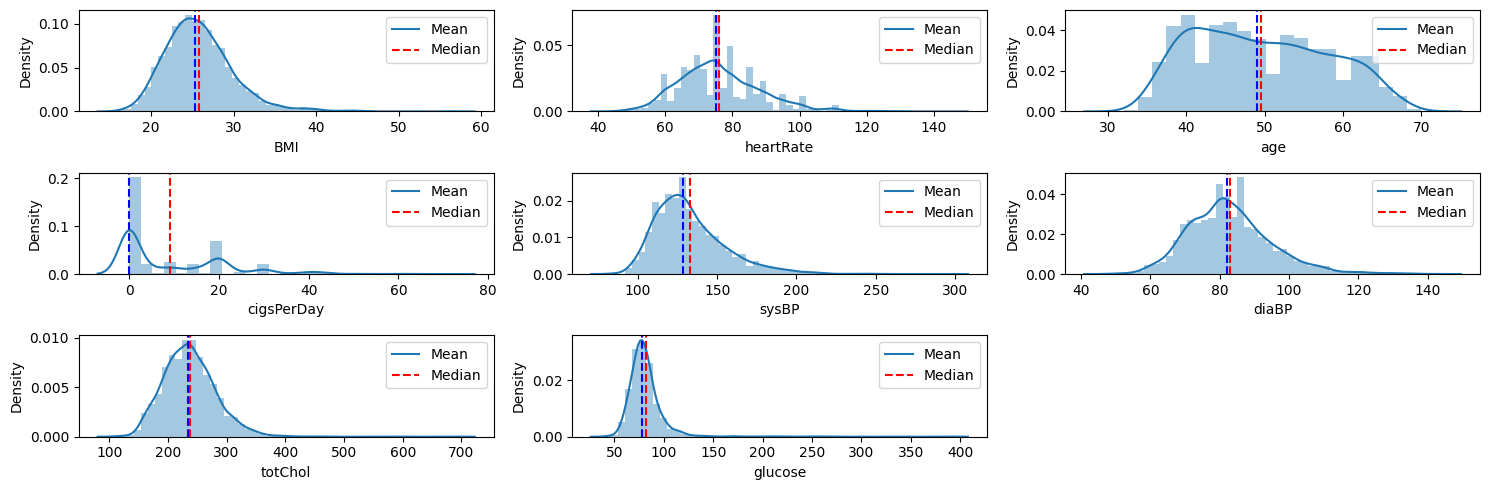

In [ ]:
#distribution check
dist_check(df,con)

In [ ]:
#check skewness in data
df[con].skew()

BMI           1.023120
heartRate     0.676019
age           0.225796
cigsPerDay    1.224311
sysBP         1.175837
diaBP         0.718173
totChol       0.941680
glucose       6.357799
dtype: float64

In [ ]:
#first apply log technique to handle outiers
log_data=np.log1p(df[con])

In [ ]:
#check skewness
log_data.skew()

BMI           0.368616
heartRate     0.165362
age          -0.015053
cigsPerDay    0.279730
sysBP         0.612834
diaBP         0.193218
totChol       0.007802
glucose       2.305005
dtype: float64

In [ ]:
#check distribution
dist_check(log_data,con)

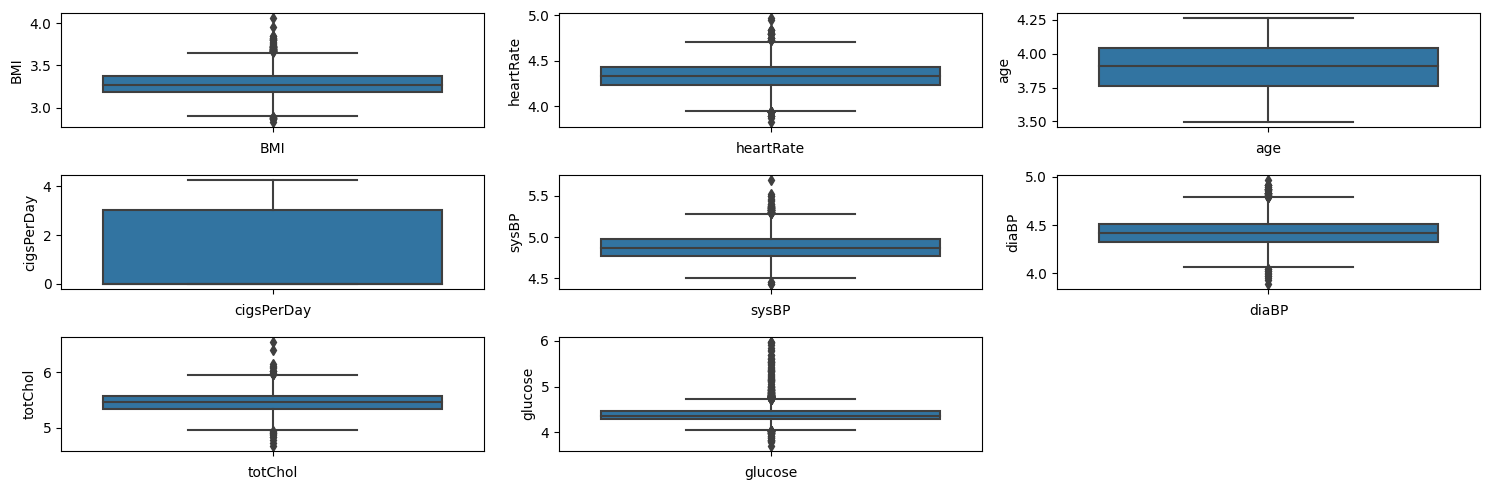

In [ ]:
#check outliers
check_outier(log_data,con)

In [ ]:
#If a value in the column is less than lower_bound, it will be replaced with lower_bound.
#If a value in the column is greater than upper_bound, it will be replaced with upper_bound.
#fuction for outliers
def clip_outliers(f,col):
    for i in col:
        q1 = f[i].quantile(0.25)
        q3 = f[i].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        # replace the outliers with lower and upper bound
        f[i] = f[i].clip(lower, upper)
    return f

In [ ]:
#remove the outliers
clean_data=clip_outliers(log_data,con)

In [ ]:
clean_data.skew()

BMI           0.183837
heartRate     0.118861
age          -0.015053
cigsPerDay    0.279730
sysBP         0.476437
diaBP         0.134122
totChol      -0.062503
glucose       0.258543
dtype: float64

##### What all outlier treatment techniques have you used and why did you use those techniques?

If our data is left- and right-skewed, we can apply the square root transformation technique. It helps you with data normalization. If our data is highly skewed, then we apply the log10 technique. We apply both techniques, but in the dataset outliers are still perset, so we use the clip technique to remove outliers.
*   If a value in the column is less than lower_bound, it will be replaced with lower_bound.
*   If a value in the column is greater than upper_bound, it will be replaced with upper_bound.



### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
#copy dataset
cvd=df.copy()

In [ ]:
#we know that systolic_bp and diastolic_bp data high correlation so we can merge both column and create new column pulse_pressure
cvd['pulse_pressure'] = cvd['sysBP'] - cvd['diaBP']

According to the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK), a person’s A1C results may be as follows:

A person without diabetes: below 5.7%

*   A person without diabetes: below 5.7%
*   A person with prediabetes: 5.7–6.4%
*   A person with diabetes: 6.5% or over

Fasting blood sugar levels may indicate that an individual is prediabetic or diabetic based on the following ranges:

*   Normal: 99 mg/dL or lower
*   Prediabetes: 100 mg/dL to 125 mg/dL
*   Diabetes: 126 mg/dL or above


In [ ]:
#lets encoding of glucose level
#normaly below 100 level we consider no Diabetes and above this level we can say Diabetes
cvd['glucose'] = np.where(cvd['glucose'] <= 100, 0,1)
cvd.loc[(cvd['glucose']==0) & (cvd['diabetes']==1),'glucose']=1

*   We can drop the systolic_bp and diastolic_bp because pulse_pressure gives the same information.
*   We can drop the is_smoking because cigs_per_day gives the same information.
*   We know that glucose level give the information about diabetes so we remove the diabetes column


In [ ]:
#lets drop unimportant data columns
cvd.drop(['sysBP','diaBP','is_smoking','diabetes'],axis=1,inplace=True)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
features=cvd.drop(['TenYearCHD'],axis=1)
target=cvd['TenYearCHD']

**1.chi2 test:-**

The Chi-Square test is a statistical method used for feature selection in machine learning. It is used to determine the relationship between two categorical variables1. The Chi-Square test calculates the chi-squared statistic and p-value for each feature and selects the most significant features based on these values. By using the Chi-Square test, we can improve model accuracy, reduce training time, and avoid overfitting.


In [ ]:
#first we use chi2 test and find best features
test1 = SelectKBest(score_func=chi2, k='all')
ch = test1.fit(features, target)
ch_score=ch.scores_
ch_data=pd.DataFrame({'Features':features.columns,'Ch_score':ch_score})
ch_data.sort_values(by='Ch_score',ascending=False)

Features    Ch_score
11   pulse_pressure  657.863215
0               age  255.538687
7           totChol  254.641748
3        cigsPerDay  228.749999
6      prevalentHyp   64.377708
4            BPMeds   25.102438
10          glucose   20.941902
5   prevalentStroke   15.861998
2               sex   13.778390
8               BMI   10.039216
1         education    4.761842
9         heartRate    2.722895

**2.ExtraTreesClassifier:-**

In [ ]:
#use ExtraTreesClassifier
# model fitting
etc = ExtraTreesClassifier()
et=etc.fit(features,target)
# ranking feature based on importance
Et_data=pd.DataFrame({'Features':features.columns,'Et_score':et.feature_importances_})
Et_data.sort_values(by='Et_score',ascending=False)

Features  Et_score
11   pulse_pressure  0.167595
0               age  0.162189
7           totChol  0.152888
8               BMI  0.152822
9         heartRate  0.138745
3        cigsPerDay  0.091955
1         education  0.058428
6      prevalentHyp  0.023807
2               sex  0.018362
10          glucose  0.015893
4            BPMeds  0.009815
5   prevalentStroke  0.007501

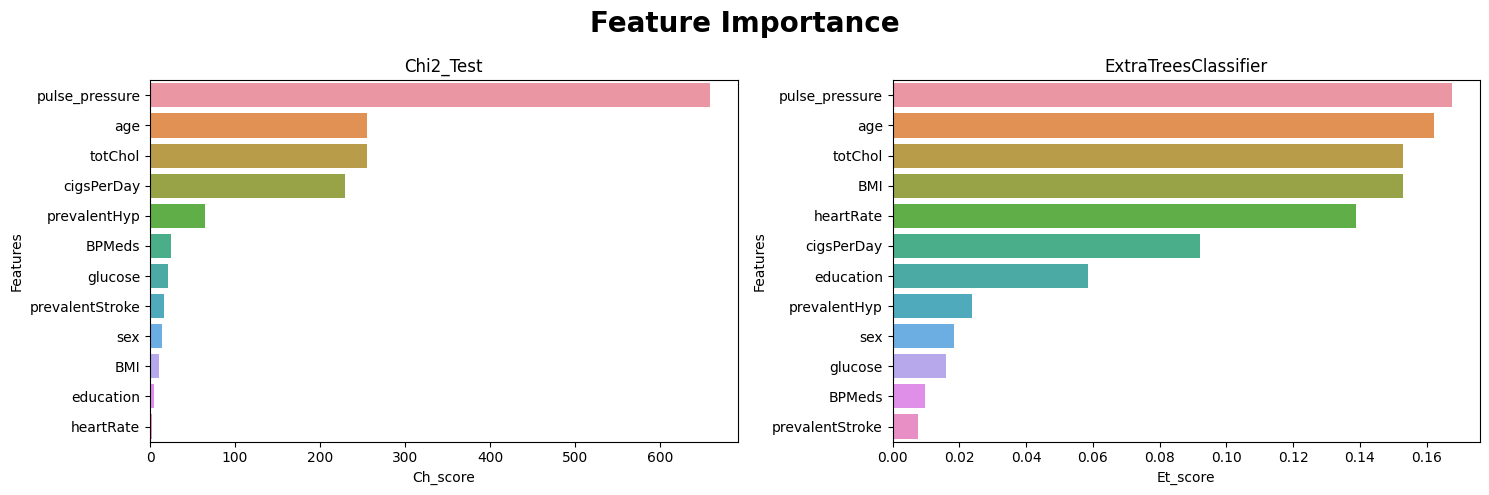

In [ ]:
#important features
fig,axs=plt.subplots(1,2,figsize=(15,5))

sns.barplot(ch_data.sort_values(by='Ch_score',ascending=False),x='Ch_score',y='Features',ax=axs[0])
axs[0].set_title('Chi2_Test')

sns.barplot(Et_data.sort_values(by='Et_score',ascending=False),x='Et_score',y='Features',ax=axs[1])
axs[1].set_title('ExtraTreesClassifier')
plt.suptitle('Feature Importance', fontsize=20, fontweight='bold')
plt.tight_layout()

##### What all feature selection methods have you used  and why?


**chi2** -->The Chi-Square test is a statistical method used for feature selection in machine learning. It is used to determine the relationship between two categorical variables. The Chi-Square test calculates the chi-squared statistic and p-value for each feature and selects the most significant features based on these values. By using the Chi-Square test, we can improve model accuracy, reduce training time, and avoid overfitting.

**ExtraTreesClassifier**--> The ExtraTreesClassifier is a type of ensemble learning technique that aggregates the results of multiple randomized decision trees (also known as extra-trees) on various sub-samples of the dataset and uses averaging to improve predictive accuracy and control over-fitting

**NOTE-**  higher values indicating a stronger dependency between the feature and the target variable.

##### Which all features you found important and why?

After the analysis, we find that 'age','totChol','pulse_pressure','glucose' columns are important because these columns have a high ch_score and Et_score compared to others.

### 5. Data Transformation

In [ ]:
#create copy of dataset
ml_data=cvd.copy()

In [ ]:
#skewed data
skew_data=cvd[['cigsPerDay','totChol','BMI','heartRate','pulse_pressure']]

In [ ]:
#use log transformation technique to handle the outliers
new_data=np.log1p(skew_data)

In [ ]:
#check skewness
new_data.skew()

cigsPerDay        0.279730
totChol           0.007802
BMI               0.368616
heartRate         0.165362
pulse_pressure    0.354174
dtype: float64

In [ ]:
#clip_outliers in glucose
new_data=clip_outliers(new_data,['cigsPerDay','totChol','BMI','heartRate','pulse_pressure'])

In [ ]:
#check outliers
new_data.skew()

cigsPerDay        0.279730
totChol          -0.062503
BMI               0.183837
heartRate         0.118861
pulse_pressure    0.261377
dtype: float64

In [ ]:
#update dataset
ml_data.update(new_data)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

After conducting the analysis, it has been determined that the data does not follow a normal distribution. In addition, there are some outliers present within the dataset. In order to address this issue, various transformation techniques are employed. For this particular dataset, the log transformation technique is utilized. This technique effectively handles the majority of outliers, however, there are still some outliers that persist. As a result, it becomes necessary to clip these outliers, as completely removing the data is not an option due to the importance of all patient data.

### 6. Data Splitting

In [ ]:
#we drop unimportant features that reduce the accuracy
ml_data.drop(['heartRate','education','BMI'],axis=1,inplace=True)

In [ ]:
# select features variables
features=ml_data.drop(['TenYearCHD'],axis=1)
target=ml_data['TenYearCHD']

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_Train, x_Test, y_train, y_test=train_test_split(features,target, test_size=0.2, stratify=target,random_state=6)

In [ ]:
#split the data in same ratio
print(f' Before split data ratio ={Counter(target)}')
print(f'after split data ratio ={Counter(y_test)}')

 Before split data ratio =Counter({0: 2879, 1: 511})
after split data ratio =Counter({0: 576, 1: 102})


##### What data splitting ratio have you used and why?

The train_test_split method randomly divides our data into two sets: the training set and the testing set. The split is done in such a way that 80% of the data is allocated for training purposes, while the remaining 20% is reserved for testing the trained model. This ratio ensures that we have a sufficient amount of data for training while still having a substantial portion for evaluation.

In addition to splitting the data based on the train-test ratio, we have also taken into consideration the ratio of classes within the data. By maintaining the same ratio of classes in both the training and testing sets, we aim to increase the accuracy of our model and ensure that it can accurately predict data from each class.

###7.Handling Imbalance

**SMOTE** : -
SMOTE, which stands for Synthetic Minority Oversampling Technique, is a valuable technique used in classification problems to address the issue of imbalanced datasets. In such datasets, there is a significant disparity in the number of examples between the majority and minority classes, causing the model to struggle in learning an accurate decision boundary.

SMOTE works by randomly selecting a minority class instance and finding its nearest neighbors. It then generates synthetic examples along the line segments connecting the instance to its neighbors. These synthetic examples are created by combining the feature values of the minority class instance with those of its neighbors. By doing so, SMOTE effectively expands the minority class, increasing its representation in the dataset.


In [ ]:
# Handling target class imbalance using SMOTE
smote_enn = SMOTEENN(random_state=5)
# fit predictor and target variable
x_smote, y_smote = smote_enn.fit_resample(x_Train, y_train)

In [ ]:
#check data imbalance
print(f'before SMOTE class radio={Counter(y_train)}')
print(f'after SMOTE class radio={Counter(y_smote)}')

before SMOTE class radio=Counter({0: 2303, 1: 409})
after SMOTE class radio=Counter({1: 1664, 0: 1411})


### 8. Data Scaling

In [ ]:
# data scaling or preprocessing
# Create a robust scaler object
scaler = RobustScaler()

In [ ]:
# Scaling your data
x_train=scaler.fit_transform(x_smote)
x_test=scaler.transform(x_Test)

##### Which method have you used to scale you data and why?

The standard scalar method allows us to normalize our data so that each feature is on the same scale, making it easier to compare and analyze. This helps us to determine which features have the most impact on the outcome.

## ***7. ML Model Implementation***

###1. KNN (K-Nearest Neighbours)

In [ ]:
#fuction for find metric score
def metric_score(model,y_test,y_pred):
  mt=pd.DataFrame({'Model Name':[model]})
  # Calculating Evaluation Matrix
  mt['ROC_AUC']=roc_auc_score(y_test,y_pred)
  mt['Precision']= precision_score(y_test,y_pred)
  mt['Recall_train']=recall_score(y_smote,y_train_pred)
  mt['Recall_test'] = recall_score(y_test,y_pred)
  mt['F1_score'] = f1_score(y_test,y_pred)
  return mt

In [ ]:
#fuction for confusion matrix
def conf_matrix(y_true,y_pred):
  plt.figure(figsize=(8,4))
  plt.subplot(1,2,1)
  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('True')

  # Calculate precision and recall for each threshold
  precision, recall, _ = precision_recall_curve(y_true, y_pred)
  # Calculate the area under the curve (AUC)
  auc_score = auc(recall, precision)

  #plot curve
  plt.subplot(1,2,2)
  plt.plot(recall, precision, marker='.')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.tight_layout()
  plt.show()

In [ ]:
#cv and scorer for gridsearchcv
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5, random_state = 10)
scorer = make_scorer(recall_score, average = 'binary')

In [ ]:
# ML Model - 1 Implementation
knn = KNeighborsClassifier(n_neighbors=10)
# Fit the Algorithm
knn.fit(x_train,y_smote)
# Predict on the model
y_pred=knn.predict(x_test)
y_train_pred=knn.predict(x_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
knn_metric=metric_score('KNN',y_test,y_pred)
knn_metric


Model Name   ROC_AUC  Precision  Recall_train  Recall_test  F1_score
0        KNN  0.586959   0.202055      0.861178     0.578431  0.299492

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the model
knn = KNeighborsClassifier()
# Define the grid of hyperparameters
param_grid = {
    'n_neighbors': [10,12,15],
    #'weights': ['uniform', 'distance'],
    #'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan']
}

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring=scorer)
grid_search.fit(x_train,y_smote)

# Print the best hyperparameters
print("Best parameters: ", grid_search.best_params_)
print("Best Recall score: ", grid_search.best_score_)

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 15}
Best Recall score:  0.8466290386772315


In [ ]:
# Fit the Algorithm
knn_best_param = grid_search.best_estimator_
# Predict on the model
y_pred = knn_best_param.predict(x_test)
y_train_pred=knn_best_param.predict(x_train)

In [ ]:
# Visualizing evaluation Metric Score chart
knn_final=metric_score('KNN_best',y_test,y_pred)
knn_final

Model Name   ROC_AUC  Precision  Recall_train  Recall_test  F1_score
0   KNN_best  0.609375   0.208589      0.879808     0.666667  0.317757

              precision    recall  f1-score   support

      No CHD       0.90      0.55      0.69       576
         CHD       0.21      0.67      0.32       102

    accuracy                           0.57       678
   macro avg       0.56      0.61      0.50       678
weighted avg       0.80      0.57      0.63       678



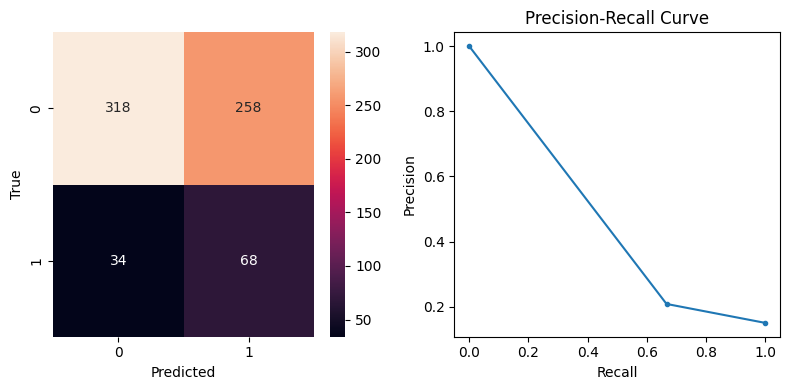

In [ ]:
#classification report
class_report=classification_report(y_test,y_pred,target_names=['No CHD', 'CHD'])
print(class_report)
# fuction for plot and compare actual and predict data
conf_matrix(y_test,y_pred)

##### Which hyperparameter optimization technique have you used and why?

*GridSearchCV*

*   A grid search CV is a method for finding the optimal parameters for a predictive model.
*   It involves testing multiple parameters by cross-validation and extracting the best parameters to apply to the model.
*   During GridSearchCV, hyperparameters are tuned to determine optimal values for a given model.
*   In the end, we can select the best parameters from the listed hyperparameters


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


*   **KNN train Recall score 86% and test Recall score 57%.**
*   **After hyperperameter tuning, KNN train Recall score 87% and test Recall score 66%.**
*   **This model predicts accurately 68 patients out of 102 having a risk of CVD.**


###2. LogisticRegression

In [ ]:
# ML Model - 1 Implementation
lr = LogisticRegression()
# Fit the Algorithm
lr.fit(x_train,y_smote)
# Predict on the model
y_pred=lr.predict(x_test)
y_train_pred=lr.predict(x_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
lr_metric=metric_score('LogisticRegression',y_test,y_pred)
lr_metric


Model Name   ROC_AUC  Precision  Recall_train  Recall_test  \
0  LogisticRegression  0.640217   0.222552      0.743389     0.735294   

   F1_score  
0  0.341686

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the model
lr = LogisticRegression(random_state=6)
# Define the grid of hyperparameters
param_grid = {
    "penalty": ["l2", "elasticnet", "none"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "C": [0.001,0.01,1]
}

# Perform grid search
lr_grid = GridSearchCV(lr, param_grid, cv=cv, scoring=scorer)
lr_grid.fit(x_train,y_smote)

# Print the best hyperparameters
print("Best parameters: ", lr_grid.best_params_)
print("Best Recall score: ", lr_grid.best_score_)

Best parameters:  {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Recall score:  0.8469893990375919


In [ ]:
# Fit the Algorithm
lr_best_param = lr_grid.best_estimator_
# Predict on the model
y_pred = lr_best_param.predict(x_test)
y_train_pred=lr_best_param.predict(x_train)

In [ ]:
# Visualizing evaluation Metric Score chart
lr_final=metric_score('LogisticRegression',y_test,y_pred)
lr_final

Model Name   ROC_AUC  Precision  Recall_train  Recall_test  \
0  LogisticRegression  0.661101   0.219212      0.825721     0.872549   

   F1_score  
0  0.350394

              precision    recall  f1-score   support

      No CHD       0.95      0.45      0.61       576
         CHD       0.22      0.87      0.35       102

    accuracy                           0.51       678
   macro avg       0.59      0.66      0.48       678
weighted avg       0.84      0.51      0.57       678



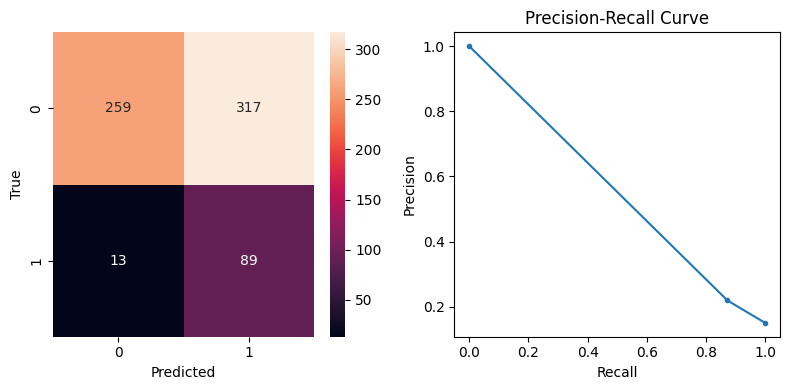

In [ ]:
#classification report
class_report=classification_report(y_test,y_pred,target_names=['No CHD', 'CHD'])
print(class_report)
conf_matrix(y_test,y_pred)

##### Which hyperparameter optimization technique have you used and why?

*GridSearchCV*

*   A grid search CV is a method for finding the optimal parameters for a predictive model.
*   It involves testing multiple parameters by cross-validation and extracting the best parameters to apply to the model.
*   During GridSearchCV, hyperparameters are tuned to determine optimal values for a given model.
*   In the end, we can select the best parameters from the listed hyperparameters


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   **Logistic Regression train Recall score 74% and test Recall score 73%.**
*   **After hyperperameter tuning, Logistic Regression train Recall score 82% and test Recall score 87%.**
*   **This model F1 test score is 35%.**
*   **This model predicts accurately 89 patients out of 102 having a risk of CVD.**


###3. SVM

In [ ]:
from sklearn.svm import SVC
# ML Model - 1 Implementation
sv = SVC()
# Fit the Algorithm
sv.fit(x_train,y_smote)
# Predict on the model
y_pred=sv.predict(x_test)
y_train_pred=sv.predict(x_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
sv_metric=metric_score('LogisticRegression',y_test,y_pred)
sv_metric


Model Name   ROC_AUC  Precision  Recall_train  Recall_test  \
0  LogisticRegression  0.625306   0.222591       0.78125     0.656863   

   F1_score  
0  0.332506

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the model
sv = SVC()
# Define the grid of hyperparameters
param_grid = {'C': [0.1,1,2], 'gamma': [1,2,5]}

# Perform grid search
sv_grid = GridSearchCV(sv, param_grid, cv=cv, scoring=scorer)
sv_grid.fit(x_train,y_smote)
# Print the best hyperparameters
print("Best parameters: ", sv_grid.best_params_)
print("Best Recall score: ", sv_grid.best_score_)

Best parameters:  {'C': 0.1, 'gamma': 5}
Best Recall score:  0.9276337783566698


In [ ]:
# Fit the Algorithm
sv_best_param = sv_grid.best_estimator_
# Predict on the model
y_pred = sv_best_param.predict(x_test)
y_train_pred=sv_best_param.predict(x_train)

In [ ]:
# Visualizing evaluation Metric Score chart
sv_final=metric_score('SVM',y_test,y_pred)
sv_final

Model Name   ROC_AUC  Precision  Recall_train  Recall_test  F1_score
0        SVM  0.656352   0.209607      0.929087     0.941176  0.342857

              precision    recall  f1-score   support

      No CHD       0.97      0.37      0.54       576
         CHD       0.21      0.94      0.34       102

    accuracy                           0.46       678
   macro avg       0.59      0.66      0.44       678
weighted avg       0.86      0.46      0.51       678



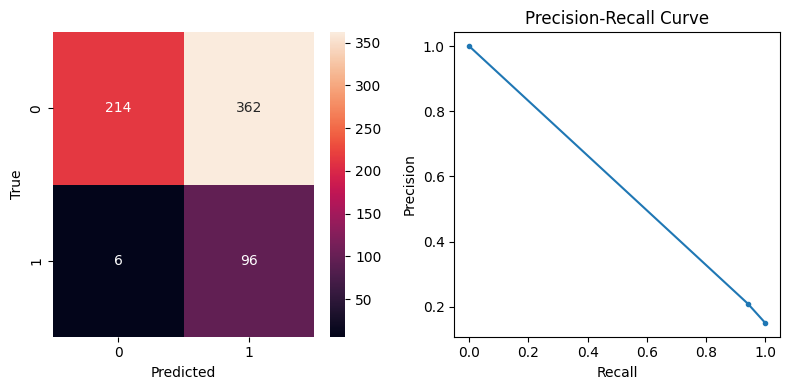

In [ ]:
#classification report
class_report=classification_report(y_test,y_pred,target_names=['No CHD', 'CHD'])
print(class_report)
conf_matrix(y_test,y_pred)

##### Which hyperparameter optimization technique have you used and why?

*GridSearchCV*

*   A grid search CV is a method for finding the optimal parameters for a predictive model.
*   It involves testing multiple parameters by cross-validation and extracting the best parameters to apply to the model.
*   During GridSearchCV, hyperparameters are tuned to determine optimal values for a given model.
*   In the end, we can select the best parameters from the listed hyperparameters


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   **SVM train Recall score 78% and test Recall score 65%.**
*   **After hyperperameter tuning, SVM train Recall score 89% and test Recall score 83%.**
*   **This model predicts accurately 85 patients out of 102 having a risk of CVD.**

###4. Naive Bayes

In [ ]:
# ML Model - 1 Implementation
nb = GaussianNB()
# Fit the Algorithm
nb.fit(x_train,y_smote)
# Predict on the model
y_pred=nb.predict(x_test)
y_train_pred=nb.predict(x_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
nb_metric=metric_score('Naive Bayes',y_test,y_pred)
nb_metric

Model Name   ROC_AUC  Precision  Recall_train  Recall_test  F1_score
0  Naive Bayes  0.622804   0.231061      0.660457     0.598039  0.333333

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the model
nb = GaussianNB()
# Define the grid of hyperparameters
param_grid = {
    "var_smoothing": np.logspace(0.6,-9, num=50)
}

# Perform grid search
nb_grid = GridSearchCV(nb, param_grid, cv=cv, scoring=scorer)
nb_grid.fit(x_train,y_smote)

# Print the best hyperparameters
print("Best parameters: ", nb_grid.best_params_)
print("Best Recall score: ", nb_grid.best_score_)

Best parameters:  {'var_smoothing': 3.9810717055349722}
Best Recall score:  0.8516755309526394


In [ ]:
# Fit the Algorithm
nb_best_param = nb_grid.best_estimator_
# Predict on the model
y_pred = nb_best_param.predict(x_test)
y_train_pred=nb_best_param.predict(x_train)

In [ ]:
# Visualizing evaluation Metric Score chart
nb_final=metric_score('Naive Bayes',y_test,y_pred)
nb_final

Model Name   ROC_AUC  Precision  Recall_train  Recall_test  F1_score
0  Naive Bayes  0.643433   0.207852      0.852163     0.882353  0.336449

In [ ]:
#classification report
class_report=classification_report(y_test,y_pred,target_names=['No CHD', 'CHD'])
print(class_report)
conf_matrix(y_test,y_pred)

              precision    recall  f1-score   support

      No CHD       0.95      0.40      0.57       576
         CHD       0.21      0.88      0.34       102

    accuracy                           0.48       678
   macro avg       0.58      0.64      0.45       678
weighted avg       0.84      0.48      0.53       678



##### Which hyperparameter optimization technique have you used and why?

*GridSearchCV*

*   A grid search CV is a method for finding the optimal parameters for a predictive model.
*   It involves testing multiple parameters by cross-validation and extracting the best parameters to apply to the model.
*   During GridSearchCV, hyperparameters are tuned to determine optimal values for a given model.
*   In the end, we can select the best parameters from the listed hyperparameters


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   **SVM train Recall score 65% and test Recall score 59%.**
*   **After hyperperameter tuning, SVM train Recall score 84% and test Recall score 88%.**
*   **This model predicts accurately 90 patients out of 102 having a risk of CVD.**

###5.DecisionTree

In [ ]:
#model name
dt=DecisionTreeClassifier()
# Fit the Algorithm
dt.fit(x_train,y_smote)
# Predict on the model
y_pred=dt.predict(x_test)
y_train_pred=dt.predict(x_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
dt_metric=metric_score('DecisionTree',y_test,y_pred)
dt_metric

Model Name  ROC_AUC  Precision  Recall_train  Recall_test  F1_score
0  DecisionTree  0.60095   0.224576           1.0     0.519608  0.313609

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the model
# Defining the Hyperparameters
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [4,6,8,10],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,2,3],
    'max_features': ['sqrt', 'log2']
}
dt_model = DecisionTreeClassifier(random_state = 10)
dt_grid = GridSearchCV(dt_model, params, cv = cv, scoring = scorer)
dt_grid.fit(x_train,y_smote)
# Print the best hyperparameters
print("Best parameters: ", dt_grid.best_params_)
print("Best R2 score: ", dt_grid.best_score_)

Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best R2 score:  0.8330500379897969


In [ ]:
# ML Model - 2 Implementation
# Fit the Algorithm
dt_best_param = dt_grid.best_estimator_
# Predict on the model
y_pred = dt_best_param.predict(x_test)
y_train_pred=dt_best_param.predict(x_train)

In [ ]:
# Visualizing evaluation Metric Score chart
dt_final=metric_score('DecisionTree',y_test,y_pred)
dt_final

Model Name   ROC_AUC  Precision  Recall_train  Recall_test  F1_score
0  DecisionTree  0.608405   0.224409      0.894832     0.558824  0.320225

              precision    recall  f1-score   support

      No CHD       0.89      0.66      0.76       576
         CHD       0.22      0.56      0.32       102

    accuracy                           0.64       678
   macro avg       0.56      0.61      0.54       678
weighted avg       0.79      0.64      0.69       678



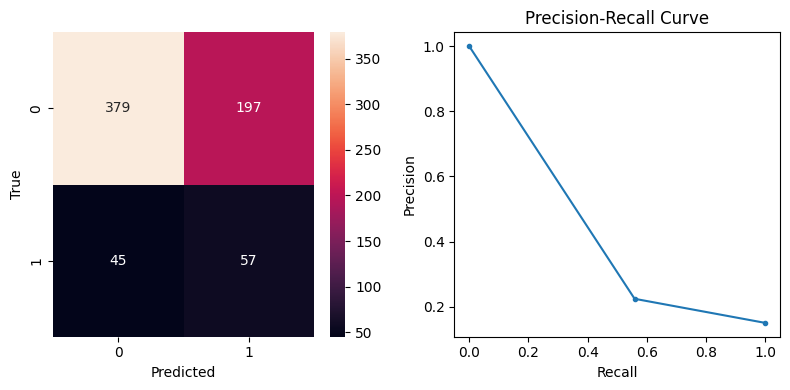

In [ ]:
#classification report
class_report=classification_report(y_test,y_pred,target_names=['No CHD', 'CHD'])
print(class_report)
# fuction for plot and compare actual and predict data
conf_matrix(y_test,y_pred)

##### Which hyperparameter optimization technique have you used and why?

*GridSearchCV*

*   A grid search CV is a method for finding the optimal parameters for a predictive model.
*   It involves testing multiple parameters by cross-validation and extracting the best parameters to apply to the model.
*   During GridSearchCV, hyperparameters are tuned to determine optimal values for a given model.
*   In the end, we can select the best parameters from the listed hyperparameters

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   **SVM train Recall score 100% and test Recall score 46%.**
*   **After hyperperameter tuning, SVM train Recall score 86% and test Recall score 42%.**
*   **This model predicts accurately 54 patients out of 102 having a risk of CVD.**

###6. RandomForestClassifier

In [ ]:
# ML Model - 3 Implementation
rf = RandomForestClassifier(random_state=10)
# Fit the Algorithm
rf.fit(x_train,y_smote)
# Predict on the model
y_pred=rf.predict(x_test)
y_train_pred=rf.predict(x_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
rf_metric=metric_score('RandomForest',y_test,y_pred)
rf_metric

Model Name   ROC_AUC  Precision  Recall_train  Recall_test  F1_score
0  RandomForest  0.624949   0.251163           1.0     0.529412  0.340694

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the model
rf_model = RandomForestClassifier(random_state=10)

# Define the hyperparameters and their values for the grid search
param_grid = {
    'n_estimators': [100,120],  # Number of trees in the forest
    #'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [4,6,8],  # Maximum number of levels in tree
    #'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}
# Perform grid search
rf_grid = GridSearchCV(rf_model, param_grid, cv=cv, scoring=scorer,n_jobs=-1)
rf_grid.fit(x_train,y_smote)
#best parameters
print("Best parameters: ", rf_grid.best_params_)
print("Best R2 score: ", rf_grid.best_score_)

Best parameters:  {'max_depth': 8, 'n_estimators': 100}
Best R2 score:  0.8439849488042259


In [ ]:
# ML Model
# Fit the Algorithm
rf_best_param = rf_grid.best_estimator_
# Predict on the model
y_pred = rf_best_param.predict(x_test)
y_train_pred=rf_best_param.predict(x_train)

In [ ]:
# Visualizing evaluation Metric Score chart
rf_final=metric_score('RandomForest_tuned',y_test,y_pred)
rf_final

Model Name   ROC_AUC  Precision  Recall_train  Recall_test  \
0  RandomForest_tuned  0.645629   0.250996       0.89363     0.617647   

   F1_score  
0  0.356941

In [ ]:
#classification report
class_report=classification_report(y_test,y_pred,target_names=['No CHD', 'CHD'])
print(class_report)
# fuction for plot and compare actual and predict data
conf_matrix(y_test,y_pred)

              precision    recall  f1-score   support

      No CHD       0.91      0.67      0.77       576
         CHD       0.25      0.62      0.36       102

    accuracy                           0.67       678
   macro avg       0.58      0.65      0.57       678
weighted avg       0.81      0.67      0.71       678



##### Which hyperparameter optimization technique have you used and why?

*GridSearchCV*

*   A grid search CV is a method for finding the optimal parameters for a predictive model.
*   It involves testing multiple parameters by cross-validation and extracting the best parameters to apply to the model.
*   During GridSearchCV, hyperparameters are tuned to determine optimal values for a given model.
*   In the end, we can select the best parameters from the listed hyperparameters

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   **RandomForestClassifier train Recall score 100% and test Recall score 53%.**
*   **After hyperperameter tuning, RandomForestClassifier train Recall score 90% and test Recall score 61%.**
*   **This model predicts accurately 63 patients out of 102 having a risk of CVD.**

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [ ]:
# final dataframe of metric score
final_result=pd.concat([knn_final,
                        lr_final,
                        sv_final,
                        nb_final,
                        dt_final,
                        rf_final],axis=0,ignore_index=True)
final_result

Model Name   ROC_AUC  Precision  Recall_train  Recall_test  \
0            KNN_best  0.609375   0.208589      0.879808     0.666667   
1  LogisticRegression  0.661101   0.219212      0.825721     0.872549   
2                 SVM  0.656352   0.209607      0.929087     0.941176   
3         Naive Bayes  0.643433   0.207852      0.852163     0.882353   
4        DecisionTree  0.608405   0.224409      0.894832     0.558824   
5  RandomForest_tuned  0.645629   0.250996      0.893630     0.617647   

   F1_score  
0  0.317757  
1  0.350394  
2  0.342857  
3  0.336449  
4  0.320225  
5  0.356941

In [ ]:
#metric data plot
plt.figure(figsize=(10,5))
m_new=pd.melt(final_result,id_vars='Model Name',value_vars=['Recall_train','Recall_test'])
sns.barplot(x='Model Name',y='value',data=m_new,hue='variable')
plt.xticks(rotation=45)
plt.title('Metric Recall score')
plt.show()

Recall:-Recall, also known as the positive rate, is a crucial metric used in evaluating the performance of a model. It measures the number of positive instances that the model correctly claims as positive, relative to the actual number of positive instances in the dataset.
        
        recall=TP/(TP+FN)
      
*  True Positives (TP): These are cases in which we predicted yes (they have the risk factors), and they do have the risk factors.
*  False Negatives (FN): We predicted no, but they actually do have the risk factors.

the high recall would be important to insure that most patients with the disease are correctly identified

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the analysis, we can conclude that logistic regression, Naive Bayes are  good model for identifying cardiovascular disease. The model exhibits an 90% recall accuracy, indicating that it accurately predicts patients with cardiovascular disease. This high recall accuracy suggests that the model is successful in identifying individuals who are at risk.

However, it is important to note that the f1 score of the model is low. The f1 score is a measure of the model's performance, taking into account both precision and recall. A low f1 score indicates that the model did not correctly identify non-cardiovascular patients. While the model performs well in identifying patients with cardiovascular disease, it may struggle in accurately classifying individuals without the disease.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
# overall best features in logistic regression model
score=np.round(lr_best_param.coef_[0],2)
features_name=features.columns
imp_features=list(zip(features_name,score))
feature_data=pd.DataFrame(imp_features,columns=['Name','Score']).sort_values(by='Score')

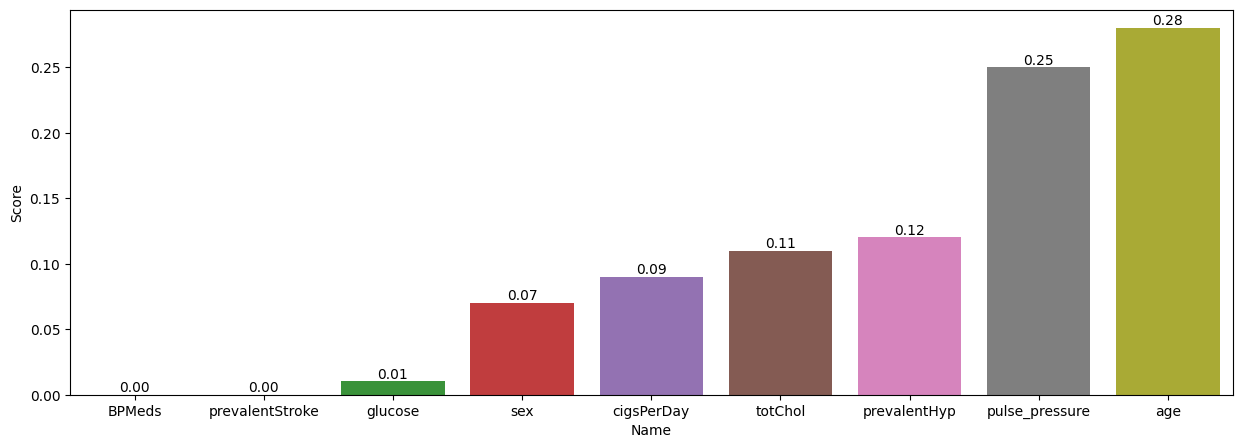

In [ ]:
plt.figure(figsize=(15,5))
bars=sns.barplot(x='Name',y='Score',data=feature_data)
for bar in bars.patches:
    x = bar.get_x() + bar.get_width() / 2  # x-coordinate (center of the bar)
    y = bar.get_y() + bar.get_height()  # y-coordinate (top of the bar)
    value = f'{bar.get_height():.2f}'  # height of the bar represents the value (score)
    plt.text(x, y, value, ha='center', va='bottom')  # place the text at the top-center of each bar

####**LIME**

*   This tool helps identify which features are the most important for making a prediction. It also helps to identify how a certain feature contributes to the prediction. This helps to understand how the model works and why it made a certain decision



In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b6651309601a35fbe0ddd50d14f1d5f12ab80a25b5f053bafdb719a4a7ac496b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
#model explainability tool
import lime
import lime.lime_tabular

Intercept 0.5138933096870408
Prediction_local [0.62093012]
Right: 0.6230651452299303


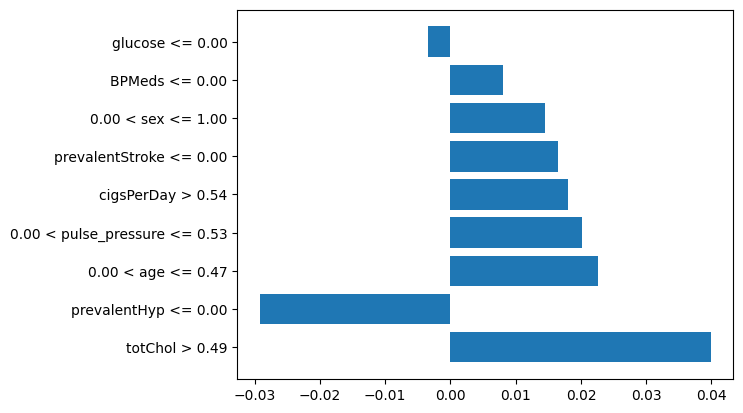

In [ ]:
# find the contribution of each feature for particuler row or data
# create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(x_train, feature_names=features.columns, class_names=['y_smote'],verbose=True, mode='classification')

# explain the first instance in the test set
exp = explainer.explain_instance(x_test[77], lr_best_param.predict_proba)

# plot a bar chart of the feature importances
vals = np.array([x[1] for x in exp.as_list()])
feature_names = np.array([x[0] for x in exp.as_list()])
plt.barh(feature_names, vals)
plt.show()

####**SHAP**

*   This tool provides a detailed explanation of the predictions made by the model, which helps to understand how the model is making decisions and identify any potential errors or misclassifications. It also provides insight into which features are most influential in the model's decisions, allowing us to identify areas where we can improve the model.




In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.9 MB/s eta 0:00:00


In [ ]:
#import shap library
import shap

In [ ]:
# Instantiate the KernelExplainer
explainer = shap.KernelExplainer(lr_best_param.predict_proba, x_train)
row=x_test[77].reshape(1,-1) # 77th row data
shap_values = explainer.shap_values(row)
# Plot
shap.initjs()
#expect value with respect of class 1
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], x_test[0,:], feature_names=features.columns)

  0%|          | 0/1 [00:00<?, ?it/s]

Through the integration of data visualization and machine learning, we can effectively identify the key factors that contribute to the development of cardiovascular disease. Age, cigarettes per day, prevalent hypertension, total cholesterol, and pulse pressure have been established as important factors in assessing the risk of heart-related conditions. By focusing on these factors, healthcare professionals can implement targeted interventions and preventive measures to mitigate the impact of cardiovascular disease and improve patient outcomes.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
# After the save the file we hide this part because we saved the joblib file in github
# Save the File
# from joblib import dump
# dump(scaler,'/content/gdrive/MyDrive/Colab Notebooks/Cardiovascular Risk Prediction/scaler_model.joblib')
# dump(lr_best_param, '/content/gdrive/MyDrive/Colab Notebooks/Cardiovascular Risk Prediction/cvd_model.joblib')

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load joblib file
url1= 'https://github.com/Vijaysiraw/ML_Classification_Cardiovascular_Risk_Prediction/raw/main/scaler_model.joblib'
url2= 'https://github.com/Vijaysiraw/ML_Classification_Cardiovascular_Risk_Prediction/raw/main/cvd_model.joblib'
u1= requests.get(url1)
u2=requests.get(url2)
sc = load(BytesIO(u1.content))
lr_model=load(BytesIO(u2.content))

In [ ]:
#unseen data
unseen_data=ml_data[ml_data['TenYearCHD']==1].sample(5,random_state=10)
unseen_x=unseen_data.drop('TenYearCHD',axis=1)
unseen_y=unseen_data['TenYearCHD']

In [ ]:
#scaling
un_x=sc.transform(unseen_x)
#apply logistic model
predict_data=lr_model.predict(un_x)

In [ ]:
#create New dataframe for comparing new data
new_df=pd.DataFrame()
new_df['actual']=np.square(unseen_y)
new_df['predict']=predict_data

In [ ]:
#actual vs predict
new_df

actual  predict
2102       1        1
1062       1        0
2377       1        1
303        1        1
1241       1        1

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project provides a valuable example of how machine learning techniques can be applied to real-world problems to achieve positive business impact.

In this project of Coronary Heart Disease (CHD) analysis, we have worked on several parameters which would help us in predicting the Probability of a persons getting a CHD in next 10years.

In the initial phase, we focused more on the problem statements and data cleaning, in order to ensure that we give them the best results out of our analysis.

We needs to focus more on :
1.   A Patient smokes or not? if yes, then how many ciggrattes per day.
2.   Weather a patient has any history of HeartStroke & HyperTension.
3.   Weather a Patient takes BP & Diabetes medicines.
4.   A patient's BMI(18.5-25bmi) & HeartRate(60-140) range.

**If we mainly focus on these above point then, we can predict that one will get any CHD disease in next 10 years or more.**

**Machine Learning conclusion:-**
*   **KNN**-Test score- 66%
*   **LogisticRegression**-Test score- 87%
*   **SVM**-Test score- 94%
*   **Naive Bayes**-Test score- 88%
*   **DecisionTree**-Test score- 55%
*   **RandomForestClassifier**-Test score- 61%

In conclusion, age, pulse pressure, prevalent hypertension, total cholesterol, and cigarettes per day are important features that can help predict the risk of cardiovascular disease. By analyzing these features, healthcare professionals can develop personalized strategies to prevent, manage, and treat CVD, ultimately improving the overall cardiovascular health of individuals.





